## Import our libraries

In [1]:
%matplotlib inline
import numpy as np
#for the sigmoid function we need expit() from scipy
import scipy.special
#library for plotting arrays
import matplotlib.pyplot as plt
# A particularly interesting backend, provided by IPython, is the inline backend. 
# This is available only for the Jupyter Notebook and the Jupyter QtConsole. 
# It can be invoked as follows: %matplotlib inline
# With this backend, the output of plotting commands is displayed inline 
# within frontends like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots are inside this notebook, not an external window.

import pandas as pd # to manage data frames and reading csv files

## Set our Global Variables
later you will need to modify these to present your solution to the Exercise

In [2]:
#number of input, hidden and output nodes
input_nodes = 60 #we have 28 * 28 matrix to describe each digit
hidden_nodes = 100
output_nodes = 2

learning_rate = 0.3
batch_size = 100

# epochs is the number of training iterations 
epochs = 1000

# datasets to read
# you can change these when trying out other datasets
train_data_file = "data/sonar_train.csv"
test_data_file = "data/sonar_test.csv"

## Specify our Dataset for Classification
Note we have indicated a train set for model training and test set for testing the learned model

## MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
The database is also widely used for training and testing in the field of machine learning.
It was created by "re-mixing" the samples from NIST's original datasets. 
The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.
Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.
<img src="mnist.png">
 
The MNIST database contains 60,000 training images and 10,000 testing images.
Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.
There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23 percent.
The original creators of the database keep a list of some of the methods tested on it.
In their original paper, they use a support vector machine to get an error rate of 0.8 percent.

### MINIST for the lab
Our training and test set contains 60K and 10K instances.
To reduce the time taken for training we can use a smaller random sample during our lab. 

Lets use the pandas library to have a look at an instance in the MNIST dataset below.

You can change the idx value to access different instances (example below accesses the 21st indexed instance)


In [3]:
# #load the mnist training data CSV file into a list
# all_data_df = pd.read_csv(data_file)

# # all_data_file = open(data_file, 'r')
# # all_data_list = all_data_file.readlines() # read all lines into memory 
# # all_data_file.close() 
# print("train set size: ", len(all_data_df.values))

# # re-arange dataset so that the class is the first column in the df

# df_cols = all_data_df.columns.tolist()
# df_cols = df_cols[-1:] + df_cols[:-1]
# all_data_df = all_data_df[df_cols]

# #Split the train/test data sets to an 80% split
# train_data_df, test_data_df = np.split(all_data_df, [int(.80*len(all_data_df.values))])



# #testing the network
# # #load the mnist test data CSV file into a list
# # #test_data_file = open("mnist/mnist_test_10.csv", 'r') # read the file with 10 instances first
# # test_data_file = open(test_file, 'r') # read the file with 10 instances first
# # test_data_list = test_data_file.readlines()
# # test_data_file.close()
# # print("test set size: ", len(test_data_list))

In [4]:
# test_data_df

In [5]:
#load the mnist training data CSV file into a list
train_data_file = open(train_data_file, 'r', encoding='utf-8-sig')
train_data_list = train_data_file.readlines() # read all lines into memory 
train_data_file.close() 
print("train set size: ", len(train_data_list))

#testing the network
#load the mnist test data CSV file into a list
#test_data_file = open("mnist/mnist_test_10.csv", 'r') # read the file with 10 instances first
test_data_file = open(test_data_file, 'r', encoding='utf-8-sig') # read the file with 10 instances first
test_data_list = test_data_file.readlines()
test_data_file.close()
print("test set size: ", len(test_data_list))

train set size:  167
test set size:  41


## Build our Artificial Neural Network class
Some of the key methods include:

- __init__ : initialisation method to set all the class variables
- train : this is the method that implments the forward and back ward pass as well as updating the wights. You should study the weight update lines to understand ; which values actually contribute to the modification of weights. Note there are two sets of weights - wih are wwights from input to hidden nodes; and who weights from hidden to output nodes.
- test: this takes a set in test instances and queries the network to obtain a prediction which can then be compared against the expected target class to compute accuracy

Some of the key hyper-parameters include:
- ep (epoch) which is the number of training iterations on the full dataset); 
- lr (learning rate) the amount of moderation used to manage by how much we adjust the weights
- batch_size the number of examples considered within a single epoch before updating network parameters; 
- hnodes (hidden nodes) the number of hidden layer nodes


In [6]:
class neuralNetwork:
    """Artificial Neural Network classifier.

    Parameters
    ------------
    lr : float
      Learning rate (between 0.0 and 1.0)
    ep : int
      Number of epochs for training the network towards achieving convergence
    batch_size : int
      Size of the training batch to be used when calculating the gradient descent. 
      batch_size = 0 standard gradient descent
      batch_size > 0 stochastic gradient descent 

    inodes : int
      Number of input nodes which is normally the number of features in an instance.
    hnodes : int
      Number of hidden nodes in the net.
    onodes : int
      Number of output nodes in the net.


    Attributes
    -----------
    wih : 2d-array
      Input2Hidden node weights after fitting 
    who : 2d-array
      Hidden2Output node weights after fitting 
    E : list
      Sum-of-squares error value in each epoch.
      
    Results : list
      Target and predicted class labels for the test data.
      
    Functions
    ---------
    activation_function : float (between 1 and -1)
        implments the sigmoid function which squashes the node input

    """

    def __init__(self, inputnodes=60, hiddennodes=100, outputnodes=2, learningrate=0.4, batch_size=167, epochs=500):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices, wih (input to hidden) and who (hidden to output)
        #a weight on link from node i to node j is w_ij
        
        
        #Draw random samples from a normal (Gaussian) distribution centered around 0.
        #numpy.random.normal(loc to centre gaussian=0.0, scale=1, size=dimensions of the array we want) 
        #scale is usually set to the standard deviation which is related to the number of incoming links i.e. 
        #1/sqrt(num of incoming inputs). we use pow to raise it to the power of -0.5.
        #We have set 0 as the centre of the guassian dist.
        # size is set to the dimensions of the number of hnodes, inodes and onodes
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #set the learning rate
        self.lr = learningrate
        
        #set the batch size
        self.bs = batch_size
        
        #set the number of epochs
        self.ep = epochs
        
        #store errors at each epoch
        self.E= []
        
        #store results from testing the model
        #keep track of the network performance on each test instance
        self.results= []
        
        #define the activation function here
        #specify the sigmoid squashing function. Here expit() provides the sigmoid function.
        #lambda is a short cut function which is executed there and then with no def (i.e. like an anonymous function)
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
   
    def batch_input(self, input_list):
        """Yield consecutive batches of the specified size from the input list."""
        for i in range(0, len(input_list), self.bs):
            yield input_list[i:i + self.bs]
    
    #train the neural net
    #note the first part is very similar to the query function because they both require the forward pass
    def train(self, train_inputs):
        """Training the neural net. 
           This includes the forward pass ; error computation; 
           backprop of the error ; calculation of gradients and updating the weights.

            Parameters
            ----------
            train_inputs : {array-like}, shape = [n_instances, n_features]
            Training vectors, where n_instances is the number of training instances and
            n_features is the number of features.
            Note this contains all features including the class feature which is in first position
        
            Returns
            -------
            self : object
        """
      
        for e in range(self.ep):
            print("Training epoch#: ", e)
            sum_error = 0.0   
            for batch in self.batch_input(train_inputs):
                #creating variables to store the gradients   
                delta_who = 0
                delta_wih = 0
                
                # iterate through the inputs sent in
                for instance in batch:
                    # split it by the commas
                    all_values = instance.split(',') 
                    # scale and shift the inputs to address the problem of diminishing weights due to multiplying by zero
                    # divide the raw inputs which are in the range 0-255 by 255 will bring them into the range 0-1
                    # multiply by 0.99 to bring them into the range 0.0 - 0.99.
                    # add 0.01 to shift them up to the desired range 0.01 - 1. 
#                     inputs = (np.asfarray(all_values[1:]) / 2.0 * 0.99) + 0.01
                    inputs = np.asfarray(all_values[1:])
                    #create the target output values for each instance so that we can use it with the neural net
                    #note we need 10 nodes where each represents one of the digits
                    targets = np.zeros(output_nodes) + 0.01 #all initialised to 0.01
                    #all_value[0] has the target class label for this instance
                    targets[int(all_values[0])] = 0.99
        
                    #convert  inputs list to 2d array
                    inputs = np.array(inputs,  ndmin=2).T
                    targets = np.array(targets, ndmin=2).T

                    #calculate signals into hidden layer
                    hidden_inputs = np.dot(self.wih, inputs)
                    #calculate the signals emerging from the hidden layer
                    hidden_outputs = self.activation_function(hidden_inputs)

                    #calculate signals into final output layer
                    final_inputs=np.dot(self.who, hidden_outputs)
                    #calculate the signals emerging from final output layer
                    final_outputs = self.activation_function(final_inputs)
        
                    #to calculate the error we need to compute the element wise diff between target and actual
                    output_errors = targets - final_outputs
                    #Next distribute the error to the hidden layer such that hidden layer error
                    #is the output_errors, split by weights, recombined at hidden nodes
                    hidden_errors = np.dot(self.who.T, output_errors)
            
                       
                    ## for each instance accumilate the gradients from each instance
                    ## delta_who are the gradients between hidden and output weights
                    ## delta_wih are the gradients between input and hidden weights
                    delta_who += np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
                    delta_wih += np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
                    
                    sum_error += np.dot(output_errors.T, output_errors)#this is the sum of squared error accumilated over each batced instance
                   
                pass #instance
            
                # update the weights by multiplying the gradient with the learning rate
                # note that the deltas are divided by batch size to obtain the average gradient according to the given batch
                # obviously if batch size = 1 then we dont need to bother with an average
                self.who += self.lr * (delta_who / self.bs)
                self.wih += self.lr * (delta_wih / self.bs)
            pass # batch
            self.E.append(np.asfarray(sum_error).flatten())
            print("errors (SSE): ", self.E[-1])
        pass # epoch
    
    #query the neural net
    def query(self, inputs_list):
        #convert inputs_list to a 2d array
        #print(numpy.matrix(inputs_list))
        #inputs_list [[ 1.   0.5 -1.5]]
        inputs = np.array(inputs_list, ndmin=2).T 
        #once converted it appears as follows
        #[[ 1. ]
        # [ 0.5]
        # [-1.5]]
        #print(numpy.matrix(inputs))
        
        #propogate input into hidden layer. This is the start of the forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        
        
        #squash the content in the hidden node using the sigmoid function (value between 1, -1)
        hidden_outputs = self.activation_function(hidden_inputs)
                
        #propagate into output layer and the apply the squashing sigmoid function
        final_inputs = np.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
     
    #iterate through all the test data to calculate model accuracy
    def test(self, test_inputs):
        self.results = []
        
        #go through each test instances
        for instance in test_inputs:
            all_values = instance.split(',') # extract the input feature values for the instance
    
            target_label = int(all_values[0]) # get the target class for the instance
    
            #scale and shift the inputs this is to make sure values dont lead to zero when multiplied with weights
#             inputs = (np.asfarray(all_values[1:]) / 2.0 * 0.99) + 0.01
            inputs = np.asfarray(all_values[1:])
    
            #query the network with test inputs
            #note this returns 10 output values ; of which the index of the highest value
            # is the networks predicted class label
            outputs = self.query(inputs)
    
            #get the index of the highest output node as this corresponds to the predicted class
            predict_label = np.argmax(outputs) #this is the class predicted by the ANN
    
            self.results.append([predict_label, target_label])
            #compute network error
            #if (predict_label == target_label):
            #    self.results.append(1)
            #else: 
            #    self.results.append(0)
            pass
        pass
        self.results = np.asfarray(self.results) # flatten results to avoid nested arrays
    
        
    

## Train the Artificial Neural Net

In [7]:
#create instance of neuralnet
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, batch_size, epochs)

n.train(train_data_list)

Training epoch#:  0
errors (SSE):  [88.10756725]
Training epoch#:  1
errors (SSE):  [75.04451506]
Training epoch#:  2
errors (SSE):  [74.27436976]
Training epoch#:  3
errors (SSE):  [72.47882983]
Training epoch#:  4
errors (SSE):  [70.83211958]
Training epoch#:  5
errors (SSE):  [69.44061409]
Training epoch#:  6
errors (SSE):  [68.11633126]
Training epoch#:  7
errors (SSE):  [66.91714661]
Training epoch#:  8
errors (SSE):  [65.79795044]
Training epoch#:  9
errors (SSE):  [64.75540534]
Training epoch#:  10
errors (SSE):  [63.77586692]
Training epoch#:  11
errors (SSE):  [62.85141902]
Training epoch#:  12
errors (SSE):  [61.97458081]
Training epoch#:  13
errors (SSE):  [61.13940254]
Training epoch#:  14
errors (SSE):  [60.34086538]
Training epoch#:  15
errors (SSE):  [59.57479361]
Training epoch#:  16
errors (SSE):  [58.83768538]
Training epoch#:  17
errors (SSE):  [58.12660031]
Training epoch#:  18
errors (SSE):  [57.43906273]
Training epoch#:  19
errors (SSE):  [56.77298381]
Training e

errors (SSE):  [26.19603195]
Training epoch#:  174
errors (SSE):  [26.14138761]
Training epoch#:  175
errors (SSE):  [26.08721243]
Training epoch#:  176
errors (SSE):  [26.03349922]
Training epoch#:  177
errors (SSE):  [25.98024097]
Training epoch#:  178
errors (SSE):  [25.92743079]
Training epoch#:  179
errors (SSE):  [25.87506194]
Training epoch#:  180
errors (SSE):  [25.82312781]
Training epoch#:  181
errors (SSE):  [25.77162193]
Training epoch#:  182
errors (SSE):  [25.72053794]
Training epoch#:  183
errors (SSE):  [25.66986963]
Training epoch#:  184
errors (SSE):  [25.6196109]
Training epoch#:  185
errors (SSE):  [25.56975578]
Training epoch#:  186
errors (SSE):  [25.52029839]
Training epoch#:  187
errors (SSE):  [25.47123299]
Training epoch#:  188
errors (SSE):  [25.42255395]
Training epoch#:  189
errors (SSE):  [25.37425574]
Training epoch#:  190
errors (SSE):  [25.32633293]
Training epoch#:  191
errors (SSE):  [25.27878022]
Training epoch#:  192
errors (SSE):  [25.23159238]
Tra

errors (SSE):  [20.56837203]
Training epoch#:  343
errors (SSE):  [20.5468077]
Training epoch#:  344
errors (SSE):  [20.52531937]
Training epoch#:  345
errors (SSE):  [20.50390649]
Training epoch#:  346
errors (SSE):  [20.48256848]
Training epoch#:  347
errors (SSE):  [20.46130479]
Training epoch#:  348
errors (SSE):  [20.44011485]
Training epoch#:  349
errors (SSE):  [20.41899814]
Training epoch#:  350
errors (SSE):  [20.3979541]
Training epoch#:  351
errors (SSE):  [20.3769822]
Training epoch#:  352
errors (SSE):  [20.35608191]
Training epoch#:  353
errors (SSE):  [20.33525271]
Training epoch#:  354
errors (SSE):  [20.31449408]
Training epoch#:  355
errors (SSE):  [20.29380551]
Training epoch#:  356
errors (SSE):  [20.27318649]
Training epoch#:  357
errors (SSE):  [20.25263652]
Training epoch#:  358
errors (SSE):  [20.2321551]
Training epoch#:  359
errors (SSE):  [20.21174175]
Training epoch#:  360
errors (SSE):  [20.19139598]
Training epoch#:  361
errors (SSE):  [20.1711173]
Trainin

errors (SSE):  [17.66561398]
Training epoch#:  514
errors (SSE):  [17.65197509]
Training epoch#:  515
errors (SSE):  [17.63836454]
Training epoch#:  516
errors (SSE):  [17.62478221]
Training epoch#:  517
errors (SSE):  [17.61122798]
Training epoch#:  518
errors (SSE):  [17.59770172]
Training epoch#:  519
errors (SSE):  [17.58420332]
Training epoch#:  520
errors (SSE):  [17.57073265]
Training epoch#:  521
errors (SSE):  [17.5572896]
Training epoch#:  522
errors (SSE):  [17.54387405]
Training epoch#:  523
errors (SSE):  [17.53048588]
Training epoch#:  524
errors (SSE):  [17.51712498]
Training epoch#:  525
errors (SSE):  [17.50379124]
Training epoch#:  526
errors (SSE):  [17.49048453]
Training epoch#:  527
errors (SSE):  [17.47720475]
Training epoch#:  528
errors (SSE):  [17.46395177]
Training epoch#:  529
errors (SSE):  [17.4507255]
Training epoch#:  530
errors (SSE):  [17.43752582]
Training epoch#:  531
errors (SSE):  [17.42435262]
Training epoch#:  532
errors (SSE):  [17.41120579]
Trai

errors (SSE):  [15.74948218]
Training epoch#:  677
errors (SSE):  [15.73930882]
Training epoch#:  678
errors (SSE):  [15.72915168]
Training epoch#:  679
errors (SSE):  [15.71901073]
Training epoch#:  680
errors (SSE):  [15.70888592]
Training epoch#:  681
errors (SSE):  [15.6987772]
Training epoch#:  682
errors (SSE):  [15.68868454]
Training epoch#:  683
errors (SSE):  [15.6786079]
Training epoch#:  684
errors (SSE):  [15.66854723]
Training epoch#:  685
errors (SSE):  [15.6585025]
Training epoch#:  686
errors (SSE):  [15.64847365]
Training epoch#:  687
errors (SSE):  [15.63846066]
Training epoch#:  688
errors (SSE):  [15.62846347]
Training epoch#:  689
errors (SSE):  [15.61848206]
Training epoch#:  690
errors (SSE):  [15.60851638]
Training epoch#:  691
errors (SSE):  [15.59856639]
Training epoch#:  692
errors (SSE):  [15.58863204]
Training epoch#:  693
errors (SSE):  [15.57871332]
Training epoch#:  694
errors (SSE):  [15.56881016]
Training epoch#:  695
errors (SSE):  [15.55892254]
Train

errors (SSE):  [14.28081851]
Training epoch#:  840
errors (SSE):  [14.27285874]
Training epoch#:  841
errors (SSE):  [14.26491048]
Training epoch#:  842
errors (SSE):  [14.25697371]
Training epoch#:  843
errors (SSE):  [14.24904841]
Training epoch#:  844
errors (SSE):  [14.24113456]
Training epoch#:  845
errors (SSE):  [14.23323215]
Training epoch#:  846
errors (SSE):  [14.22534114]
Training epoch#:  847
errors (SSE):  [14.21746153]
Training epoch#:  848
errors (SSE):  [14.20959329]
Training epoch#:  849
errors (SSE):  [14.2017364]
Training epoch#:  850
errors (SSE):  [14.19389085]
Training epoch#:  851
errors (SSE):  [14.18605661]
Training epoch#:  852
errors (SSE):  [14.17823367]
Training epoch#:  853
errors (SSE):  [14.17042201]
Training epoch#:  854
errors (SSE):  [14.1626216]
Training epoch#:  855
errors (SSE):  [14.15483243]
Training epoch#:  856
errors (SSE):  [14.14705447]
Training epoch#:  857
errors (SSE):  [14.13928772]
Training epoch#:  858
errors (SSE):  [14.13153215]
Trai

## Plot the model error with increasing epochs

Error at the end of each epoch has been stored in self.E
We can now use mathplotlib to plot the error at the end of each epoch. 
Our expectation is that as we continue to descend (hill-walking) we should move closer to the minima
as such error should decrease. 

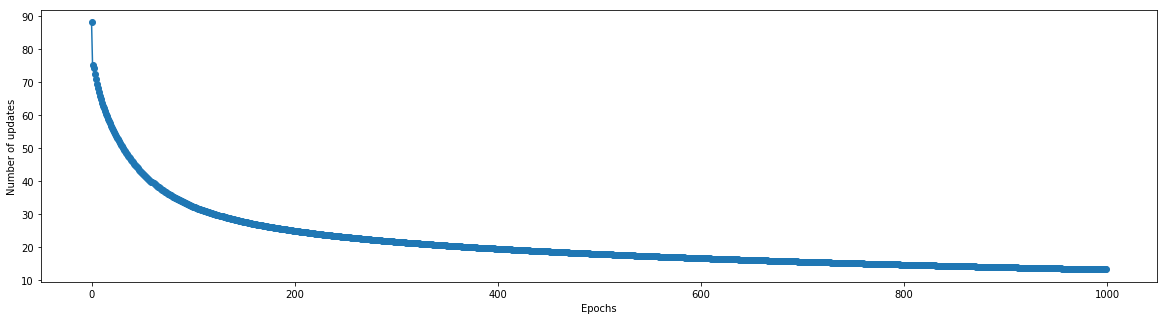

In [8]:
#print the error over epochs

plt.figure(figsize=(20,5)) #width, height settings for figures
plt.plot(range(0, n.ep), np.asfarray(n.E), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')



# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [9]:
for result in n.results:
    print(result)
    print("---------------")

## Test the ANN and compute the Accuracy
We will keep track of the predicted and actual outputs in order to 
calculate the accuracy of the model on the unseen test data. 


In [10]:
n.test(test_data_list)
#print network performance as an accuracy metric
correct = 0 # number of predictions that were correct

#iteratre through each tested instance and accumilate number of correct predictions
for result in n.results:
    if (result[0] == result[1]):
            correct += 1
    pass
pass

# print the accuracy on test set
print ("Test set accuracy% = ", (100 * correct / len(n.results)))

Test set accuracy% =  51.21951219512195


## Exploring different values of a hyperparameter - a study on the batch_size
Often we need to explore a variety of values for an algorithms hyper parameters before we can suggest the best model. For instance with the ANN we can study the accuracy by changing the number of epochs, or the batch_size or learning rate , for instance. 

Lets look at what happens when the batch size 
- batch_size = size of training data; we adopt the Gradient Decent (GD) approach to optimisaing the ANN's weights. This means that the weights are updated once at each epoch (= pass over the training dataset). The amount by which we update is an aggregation over all the training instances. 

- batch_size = 1, we adopt the Stochastic Gradient Descent (SGD) optimisation approach to updating weights. SGD is sometimes also referred to as iterative or on-line Gradient Decent (GD). In a given epoch we update the weights many times. That is to say that we check the error with each training instance; compute the gradient and update the weights. As such we don't accumulate the weight updates as we do with GD.
Here, the term "stochastic" comes from the fact that the gradient based on a single training sample is a "stochastic approximation" of the "true" cost gradient. Due to its stochastic nature, the path towards the global cost minimum is not "direct" as in GD, but may go "zig-zag" if we are visualizing the cost surface in a 2D space. However, it has been shown that SGD although is time consuming is more likely to converge to the global cost minimum.

- batch_size >1 and < len(training data); this will be an inbetween mini-batch approach to updating the weights. 




In [11]:
# numpy.random.choice generates a random sample from a given 1-D array
# we can use this to select a sample from our training data in case we want to work with a small sample
# for instance we use a small sample here such as 1500

print("This will take a few moments ...")
n_list = []
batch_sizes = []
for batch in range(1, 500, 25):
    batch_sizes.append(batch)
# batch_sizes = [1, 20, 100, 200, 500, len(train_data_list)]

for batch_size in batch_sizes:
    n = neuralNetwork(batch_size=batch_size)
    n.train(train_data_list)
    n_list.append(n)
    

This will take a few moments ...
Training epoch#:  0
errors (SSE):  [7.00891727]
Training epoch#:  1
errors (SSE):  [7.66695613]
Training epoch#:  2
errors (SSE):  [7.25056011]
Training epoch#:  3
errors (SSE):  [6.99910847]
Training epoch#:  4
errors (SSE):  [6.75538798]
Training epoch#:  5
errors (SSE):  [6.31316551]
Training epoch#:  6
errors (SSE):  [6.19331396]
Training epoch#:  7
errors (SSE):  [6.43016509]
Training epoch#:  8
errors (SSE):  [6.71267507]
Training epoch#:  9
errors (SSE):  [6.94701558]
Training epoch#:  10
errors (SSE):  [7.13913271]
Training epoch#:  11
errors (SSE):  [7.21023261]
Training epoch#:  12
errors (SSE):  [7.20944993]
Training epoch#:  13
errors (SSE):  [7.19075208]
Training epoch#:  14
errors (SSE):  [7.17831155]
Training epoch#:  15
errors (SSE):  [7.17909411]
Training epoch#:  16
errors (SSE):  [7.1934801]
Training epoch#:  17
errors (SSE):  [7.21934261]
Training epoch#:  18
errors (SSE):  [7.25465736]
Training epoch#:  19
errors (SSE):  [7.29851534

errors (SSE):  [0.42061493]
Training epoch#:  169
errors (SSE):  [0.41619287]
Training epoch#:  170
errors (SSE):  [0.41192148]
Training epoch#:  171
errors (SSE):  [0.40779768]
Training epoch#:  172
errors (SSE):  [0.40381748]
Training epoch#:  173
errors (SSE):  [0.39997599]
Training epoch#:  174
errors (SSE):  [0.39626744]
Training epoch#:  175
errors (SSE):  [0.39268524]
Training epoch#:  176
errors (SSE):  [0.389222]
Training epoch#:  177
errors (SSE):  [0.38586965]
Training epoch#:  178
errors (SSE):  [0.38261952]
Training epoch#:  179
errors (SSE):  [0.37946247]
Training epoch#:  180
errors (SSE):  [0.37638906]
Training epoch#:  181
errors (SSE):  [0.37338972]
Training epoch#:  182
errors (SSE):  [0.37045494]
Training epoch#:  183
errors (SSE):  [0.36757542]
Training epoch#:  184
errors (SSE):  [0.36474235]
Training epoch#:  185
errors (SSE):  [0.3619475]
Training epoch#:  186
errors (SSE):  [0.35918337]
Training epoch#:  187
errors (SSE):  [0.35644334]
Training epoch#:  188
err

errors (SSE):  [0.07196123]
Training epoch#:  337
errors (SSE):  [0.07124097]
Training epoch#:  338
errors (SSE):  [0.0705255]
Training epoch#:  339
errors (SSE):  [0.06981488]
Training epoch#:  340
errors (SSE):  [0.06910921]
Training epoch#:  341
errors (SSE):  [0.06840865]
Training epoch#:  342
errors (SSE):  [0.06771337]
Training epoch#:  343
errors (SSE):  [0.06702362]
Training epoch#:  344
errors (SSE):  [0.06633964]
Training epoch#:  345
errors (SSE):  [0.0656617]
Training epoch#:  346
errors (SSE):  [0.06499008]
Training epoch#:  347
errors (SSE):  [0.06432507]
Training epoch#:  348
errors (SSE):  [0.06366693]
Training epoch#:  349
errors (SSE):  [0.06301593]
Training epoch#:  350
errors (SSE):  [0.06237231]
Training epoch#:  351
errors (SSE):  [0.06173628]
Training epoch#:  352
errors (SSE):  [0.06110802]
Training epoch#:  353
errors (SSE):  [0.06048768]
Training epoch#:  354
errors (SSE):  [0.05987537]
Training epoch#:  355
errors (SSE):  [0.05927119]
Training epoch#:  356
er

errors (SSE):  [89.81555092]
Training epoch#:  11
errors (SSE):  [87.86707223]
Training epoch#:  12
errors (SSE):  [86.19620727]
Training epoch#:  13
errors (SSE):  [84.75677488]
Training epoch#:  14
errors (SSE):  [83.507896]
Training epoch#:  15
errors (SSE):  [82.41030912]
Training epoch#:  16
errors (SSE):  [81.42822245]
Training epoch#:  17
errors (SSE):  [80.53168787]
Training epoch#:  18
errors (SSE):  [79.69689223]
Training epoch#:  19
errors (SSE):  [78.90478752]
Training epoch#:  20
errors (SSE):  [78.13914852]
Training epoch#:  21
errors (SSE):  [77.38486311]
Training epoch#:  22
errors (SSE):  [76.62748543]
Training epoch#:  23
errors (SSE):  [75.85583962]
Training epoch#:  24
errors (SSE):  [75.06837507]
Training epoch#:  25
errors (SSE):  [74.27750131]
Training epoch#:  26
errors (SSE):  [73.50221012]
Training epoch#:  27
errors (SSE):  [72.7540571]
Training epoch#:  28
errors (SSE):  [72.03282745]
Training epoch#:  29
errors (SSE):  [71.33194761]
Training epoch#:  30
err

errors (SSE):  [27.03876035]
Training epoch#:  181
errors (SSE):  [26.94211485]
Training epoch#:  182
errors (SSE):  [26.84607303]
Training epoch#:  183
errors (SSE):  [26.75062556]
Training epoch#:  184
errors (SSE):  [26.65576318]
Training epoch#:  185
errors (SSE):  [26.56147675]
Training epoch#:  186
errors (SSE):  [26.46775721]
Training epoch#:  187
errors (SSE):  [26.37459558]
Training epoch#:  188
errors (SSE):  [26.28198302]
Training epoch#:  189
errors (SSE):  [26.18991075]
Training epoch#:  190
errors (SSE):  [26.09837015]
Training epoch#:  191
errors (SSE):  [26.00735268]
Training epoch#:  192
errors (SSE):  [25.91684994]
Training epoch#:  193
errors (SSE):  [25.82685364]
Training epoch#:  194
errors (SSE):  [25.73735562]
Training epoch#:  195
errors (SSE):  [25.64834786]
Training epoch#:  196
errors (SSE):  [25.55982246]
Training epoch#:  197
errors (SSE):  [25.47177164]
Training epoch#:  198
errors (SSE):  [25.38418778]
Training epoch#:  199
errors (SSE):  [25.29706338]
Tr

errors (SSE):  [15.3008111]
Training epoch#:  348
errors (SSE):  [15.24575771]
Training epoch#:  349
errors (SSE):  [15.19084196]
Training epoch#:  350
errors (SSE):  [15.13606435]
Training epoch#:  351
errors (SSE):  [15.08142537]
Training epoch#:  352
errors (SSE):  [15.02692555]
Training epoch#:  353
errors (SSE):  [14.97256542]
Training epoch#:  354
errors (SSE):  [14.91834552]
Training epoch#:  355
errors (SSE):  [14.86426641]
Training epoch#:  356
errors (SSE):  [14.81032865]
Training epoch#:  357
errors (SSE):  [14.75653283]
Training epoch#:  358
errors (SSE):  [14.70287953]
Training epoch#:  359
errors (SSE):  [14.64936934]
Training epoch#:  360
errors (SSE):  [14.59600286]
Training epoch#:  361
errors (SSE):  [14.5427807]
Training epoch#:  362
errors (SSE):  [14.48970347]
Training epoch#:  363
errors (SSE):  [14.43677177]
Training epoch#:  364
errors (SSE):  [14.38398623]
Training epoch#:  365
errors (SSE):  [14.33134745]
Training epoch#:  366
errors (SSE):  [14.27885606]
Trai

errors (SSE):  [84.2360203]
Training epoch#:  18
errors (SSE):  [82.17460633]
Training epoch#:  19
errors (SSE):  [80.27606112]
Training epoch#:  20
errors (SSE):  [78.52409852]
Training epoch#:  21
errors (SSE):  [76.90267568]
Training epoch#:  22
errors (SSE):  [75.39650448]
Training epoch#:  23
errors (SSE):  [73.9914763]
Training epoch#:  24
errors (SSE):  [72.67491936]
Training epoch#:  25
errors (SSE):  [71.43569113]
Training epoch#:  26
errors (SSE):  [70.26414593]
Training epoch#:  27
errors (SSE):  [69.1520241]
Training epoch#:  28
errors (SSE):  [68.09230184]
Training epoch#:  29
errors (SSE):  [67.07902894]
Training epoch#:  30
errors (SSE):  [66.10717146]
Training epoch#:  31
errors (SSE):  [65.17246817]
Training epoch#:  32
errors (SSE):  [64.27130483]
Training epoch#:  33
errors (SSE):  [63.40060668]
Training epoch#:  34
errors (SSE):  [62.55774819]
Training epoch#:  35
errors (SSE):  [61.74047801]
Training epoch#:  36
errors (SSE):  [60.94685703]
Training epoch#:  37
err

errors (SSE):  [24.35080311]
Training epoch#:  188
errors (SSE):  [24.2910595]
Training epoch#:  189
errors (SSE):  [24.23186753]
Training epoch#:  190
errors (SSE):  [24.17321771]
Training epoch#:  191
errors (SSE):  [24.11510074]
Training epoch#:  192
errors (SSE):  [24.05750755]
Training epoch#:  193
errors (SSE):  [24.0004293]
Training epoch#:  194
errors (SSE):  [23.94385733]
Training epoch#:  195
errors (SSE):  [23.8877832]
Training epoch#:  196
errors (SSE):  [23.83219865]
Training epoch#:  197
errors (SSE):  [23.77709563]
Training epoch#:  198
errors (SSE):  [23.72246625]
Training epoch#:  199
errors (SSE):  [23.66830281]
Training epoch#:  200
errors (SSE):  [23.61459779]
Training epoch#:  201
errors (SSE):  [23.56134383]
Training epoch#:  202
errors (SSE):  [23.50853373]
Training epoch#:  203
errors (SSE):  [23.45616047]
Training epoch#:  204
errors (SSE):  [23.40421717]
Training epoch#:  205
errors (SSE):  [23.35269709]
Training epoch#:  206
errors (SSE):  [23.30159367]
Train

errors (SSE):  [18.29124443]
Training epoch#:  357
errors (SSE):  [18.26777736]
Training epoch#:  358
errors (SSE):  [18.24437973]
Training epoch#:  359
errors (SSE):  [18.2210507]
Training epoch#:  360
errors (SSE):  [18.19778943]
Training epoch#:  361
errors (SSE):  [18.17459509]
Training epoch#:  362
errors (SSE):  [18.15146686]
Training epoch#:  363
errors (SSE):  [18.12840392]
Training epoch#:  364
errors (SSE):  [18.10540545]
Training epoch#:  365
errors (SSE):  [18.08247063]
Training epoch#:  366
errors (SSE):  [18.05959866]
Training epoch#:  367
errors (SSE):  [18.03678873]
Training epoch#:  368
errors (SSE):  [18.01404003]
Training epoch#:  369
errors (SSE):  [17.99135178]
Training epoch#:  370
errors (SSE):  [17.96872317]
Training epoch#:  371
errors (SSE):  [17.94615341]
Training epoch#:  372
errors (SSE):  [17.92364172]
Training epoch#:  373
errors (SSE):  [17.9011873]
Training epoch#:  374
errors (SSE):  [17.87878939]
Training epoch#:  375
errors (SSE):  [17.8564472]
Train

errors (SSE):  [40.08863696]
Training epoch#:  31
errors (SSE):  [39.60743715]
Training epoch#:  32
errors (SSE):  [39.14796152]
Training epoch#:  33
errors (SSE):  [38.70853057]
Training epoch#:  34
errors (SSE):  [38.28769074]
Training epoch#:  35
errors (SSE):  [37.8841683]
Training epoch#:  36
errors (SSE):  [37.49683375]
Training epoch#:  37
errors (SSE):  [37.12467455]
Training epoch#:  38
errors (SSE):  [36.76677434]
Training epoch#:  39
errors (SSE):  [36.42229696]
Training epoch#:  40
errors (SSE):  [36.09047432]
Training epoch#:  41
errors (SSE):  [35.77059703]
Training epoch#:  42
errors (SSE):  [35.46200719]
Training epoch#:  43
errors (SSE):  [35.16409266]
Training epoch#:  44
errors (SSE):  [34.87628253]
Training epoch#:  45
errors (SSE):  [34.59804341]
Training epoch#:  46
errors (SSE):  [34.32887635]
Training epoch#:  47
errors (SSE):  [34.06831411]
Training epoch#:  48
errors (SSE):  [33.81591892]
Training epoch#:  49
errors (SSE):  [33.57128036]
Training epoch#:  50
e

errors (SSE):  [21.10502953]
Training epoch#:  198
errors (SSE):  [21.06785815]
Training epoch#:  199
errors (SSE):  [21.03089337]
Training epoch#:  200
errors (SSE):  [20.99413269]
Training epoch#:  201
errors (SSE):  [20.95757368]
Training epoch#:  202
errors (SSE):  [20.92121394]
Training epoch#:  203
errors (SSE):  [20.88505113]
Training epoch#:  204
errors (SSE):  [20.84908292]
Training epoch#:  205
errors (SSE):  [20.81330706]
Training epoch#:  206
errors (SSE):  [20.77772132]
Training epoch#:  207
errors (SSE):  [20.74232352]
Training epoch#:  208
errors (SSE):  [20.7071115]
Training epoch#:  209
errors (SSE):  [20.67208315]
Training epoch#:  210
errors (SSE):  [20.63723641]
Training epoch#:  211
errors (SSE):  [20.60256923]
Training epoch#:  212
errors (SSE):  [20.56807961]
Training epoch#:  213
errors (SSE):  [20.53376559]
Training epoch#:  214
errors (SSE):  [20.49962524]
Training epoch#:  215
errors (SSE):  [20.46565666]
Training epoch#:  216
errors (SSE):  [20.43185797]
Tra

errors (SSE):  [16.63527745]
Training epoch#:  367
errors (SSE):  [16.61578543]
Training epoch#:  368
errors (SSE):  [16.59634845]
Training epoch#:  369
errors (SSE):  [16.57696624]
Training epoch#:  370
errors (SSE):  [16.55763852]
Training epoch#:  371
errors (SSE):  [16.53836503]
Training epoch#:  372
errors (SSE):  [16.5191455]
Training epoch#:  373
errors (SSE):  [16.49997966]
Training epoch#:  374
errors (SSE):  [16.48086727]
Training epoch#:  375
errors (SSE):  [16.46180804]
Training epoch#:  376
errors (SSE):  [16.44280175]
Training epoch#:  377
errors (SSE):  [16.42384812]
Training epoch#:  378
errors (SSE):  [16.4049469]
Training epoch#:  379
errors (SSE):  [16.38609786]
Training epoch#:  380
errors (SSE):  [16.36730074]
Training epoch#:  381
errors (SSE):  [16.3485553]
Training epoch#:  382
errors (SSE):  [16.32986129]
Training epoch#:  383
errors (SSE):  [16.31121848]
Training epoch#:  384
errors (SSE):  [16.29262663]
Training epoch#:  385
errors (SSE):  [16.27408551]
Train

errors (SSE):  [56.19023957]
Training epoch#:  37
errors (SSE):  [55.72612659]
Training epoch#:  38
errors (SSE):  [55.27055522]
Training epoch#:  39
errors (SSE):  [54.82318741]
Training epoch#:  40
errors (SSE):  [54.38370501]
Training epoch#:  41
errors (SSE):  [53.95180793]
Training epoch#:  42
errors (SSE):  [53.52721261]
Training epoch#:  43
errors (SSE):  [53.10965066]
Training epoch#:  44
errors (SSE):  [52.69886772]
Training epoch#:  45
errors (SSE):  [52.29462242]
Training epoch#:  46
errors (SSE):  [51.89668549]
Training epoch#:  47
errors (SSE):  [51.50483898]
Training epoch#:  48
errors (SSE):  [51.11887552]
Training epoch#:  49
errors (SSE):  [50.73859774]
Training epoch#:  50
errors (SSE):  [50.36381763]
Training epoch#:  51
errors (SSE):  [49.99435604]
Training epoch#:  52
errors (SSE):  [49.63004225]
Training epoch#:  53
errors (SSE):  [49.27071345]
Training epoch#:  54
errors (SSE):  [48.91621443]
Training epoch#:  55
errors (SSE):  [48.56639714]
Training epoch#:  56


errors (SSE):  [24.44589608]
Training epoch#:  203
errors (SSE):  [24.38768612]
Training epoch#:  204
errors (SSE):  [24.33001972]
Training epoch#:  205
errors (SSE):  [24.27288749]
Training epoch#:  206
errors (SSE):  [24.21628024]
Training epoch#:  207
errors (SSE):  [24.16018901]
Training epoch#:  208
errors (SSE):  [24.10460503]
Training epoch#:  209
errors (SSE):  [24.04951973]
Training epoch#:  210
errors (SSE):  [23.99492472]
Training epoch#:  211
errors (SSE):  [23.94081182]
Training epoch#:  212
errors (SSE):  [23.88717301]
Training epoch#:  213
errors (SSE):  [23.83400046]
Training epoch#:  214
errors (SSE):  [23.78128653]
Training epoch#:  215
errors (SSE):  [23.72902371]
Training epoch#:  216
errors (SSE):  [23.67720469]
Training epoch#:  217
errors (SSE):  [23.62582231]
Training epoch#:  218
errors (SSE):  [23.57486957]
Training epoch#:  219
errors (SSE):  [23.52433961]
Training epoch#:  220
errors (SSE):  [23.47422573]
Training epoch#:  221
errors (SSE):  [23.42452139]
Tr

errors (SSE):  [18.63464596]
Training epoch#:  369
errors (SSE):  [18.61191438]
Training epoch#:  370
errors (SSE):  [18.5892618]
Training epoch#:  371
errors (SSE):  [18.56668763]
Training epoch#:  372
errors (SSE):  [18.54419129]
Training epoch#:  373
errors (SSE):  [18.52177219]
Training epoch#:  374
errors (SSE):  [18.49942976]
Training epoch#:  375
errors (SSE):  [18.47716343]
Training epoch#:  376
errors (SSE):  [18.45497264]
Training epoch#:  377
errors (SSE):  [18.43285685]
Training epoch#:  378
errors (SSE):  [18.4108155]
Training epoch#:  379
errors (SSE):  [18.38884806]
Training epoch#:  380
errors (SSE):  [18.36695399]
Training epoch#:  381
errors (SSE):  [18.34513276]
Training epoch#:  382
errors (SSE):  [18.32338386]
Training epoch#:  383
errors (SSE):  [18.30170677]
Training epoch#:  384
errors (SSE):  [18.28010098]
Training epoch#:  385
errors (SSE):  [18.258566]
Training epoch#:  386
errors (SSE):  [18.23710131]
Training epoch#:  387
errors (SSE):  [18.21570644]
Traini

errors (SSE):  [52.7298255]
Training epoch#:  37
errors (SSE):  [52.26560513]
Training epoch#:  38
errors (SSE):  [51.811635]
Training epoch#:  39
errors (SSE):  [51.36753908]
Training epoch#:  40
errors (SSE):  [50.93295913]
Training epoch#:  41
errors (SSE):  [50.50755255]
Training epoch#:  42
errors (SSE):  [50.09099081]
Training epoch#:  43
errors (SSE):  [49.6829582]
Training epoch#:  44
errors (SSE):  [49.28315096]
Training epoch#:  45
errors (SSE):  [48.89127665]
Training epoch#:  46
errors (SSE):  [48.50705373]
Training epoch#:  47
errors (SSE):  [48.13021133]
Training epoch#:  48
errors (SSE):  [47.76048909]
Training epoch#:  49
errors (SSE):  [47.39763711]
Training epoch#:  50
errors (SSE):  [47.04141594]
Training epoch#:  51
errors (SSE):  [46.69159654]
Training epoch#:  52
errors (SSE):  [46.34796024]
Training epoch#:  53
errors (SSE):  [46.01029874]
Training epoch#:  54
errors (SSE):  [45.67841396]
Training epoch#:  55
errors (SSE):  [45.35211798]
Training epoch#:  56
erro

errors (SSE):  [25.28340286]
Training epoch#:  206
errors (SSE):  [25.23626371]
Training epoch#:  207
errors (SSE):  [25.18952326]
Training epoch#:  208
errors (SSE):  [25.14317535]
Training epoch#:  209
errors (SSE):  [25.09721389]
Training epoch#:  210
errors (SSE):  [25.05163296]
Training epoch#:  211
errors (SSE):  [25.00642673]
Training epoch#:  212
errors (SSE):  [24.96158948]
Training epoch#:  213
errors (SSE):  [24.91711563]
Training epoch#:  214
errors (SSE):  [24.87299968]
Training epoch#:  215
errors (SSE):  [24.82923625]
Training epoch#:  216
errors (SSE):  [24.78582008]
Training epoch#:  217
errors (SSE):  [24.74274599]
Training epoch#:  218
errors (SSE):  [24.70000891]
Training epoch#:  219
errors (SSE):  [24.65760386]
Training epoch#:  220
errors (SSE):  [24.61552597]
Training epoch#:  221
errors (SSE):  [24.57377045]
Training epoch#:  222
errors (SSE):  [24.53233262]
Training epoch#:  223
errors (SSE):  [24.49120787]
Training epoch#:  224
errors (SSE):  [24.45039169]
Tr

errors (SSE):  [20.42470097]
Training epoch#:  371
errors (SSE):  [20.40495551]
Training epoch#:  372
errors (SSE):  [20.38527434]
Training epoch#:  373
errors (SSE):  [20.36565699]
Training epoch#:  374
errors (SSE):  [20.34610295]
Training epoch#:  375
errors (SSE):  [20.32661176]
Training epoch#:  376
errors (SSE):  [20.30718293]
Training epoch#:  377
errors (SSE):  [20.28781601]
Training epoch#:  378
errors (SSE):  [20.26851052]
Training epoch#:  379
errors (SSE):  [20.249266]
Training epoch#:  380
errors (SSE):  [20.23008201]
Training epoch#:  381
errors (SSE):  [20.21095809]
Training epoch#:  382
errors (SSE):  [20.1918938]
Training epoch#:  383
errors (SSE):  [20.17288871]
Training epoch#:  384
errors (SSE):  [20.15394238]
Training epoch#:  385
errors (SSE):  [20.13505438]
Training epoch#:  386
errors (SSE):  [20.11622429]
Training epoch#:  387
errors (SSE):  [20.09745168]
Training epoch#:  388
errors (SSE):  [20.07873615]
Training epoch#:  389
errors (SSE):  [20.06007728]
Train

errors (SSE):  [44.14705147]
Training epoch#:  35
errors (SSE):  [45.63840419]
Training epoch#:  36
errors (SSE):  [43.49772655]
Training epoch#:  37
errors (SSE):  [44.64845081]
Training epoch#:  38
errors (SSE):  [42.88608577]
Training epoch#:  39
errors (SSE):  [43.74323634]
Training epoch#:  40
errors (SSE):  [42.30515187]
Training epoch#:  41
errors (SSE):  [42.91518032]
Training epoch#:  42
errors (SSE):  [41.74945591]
Training epoch#:  43
errors (SSE):  [42.15649104]
Training epoch#:  44
errors (SSE):  [41.21500816]
Training epoch#:  45
errors (SSE):  [41.45950501]
Training epoch#:  46
errors (SSE):  [40.69914004]
Training epoch#:  47
errors (SSE):  [40.8169515]
Training epoch#:  48
errors (SSE):  [40.20025261]
Training epoch#:  49
errors (SSE):  [40.22213407]
Training epoch#:  50
errors (SSE):  [39.71752252]
Training epoch#:  51
errors (SSE):  [39.669035]
Training epoch#:  52
errors (SSE):  [39.25061518]
Training epoch#:  53
errors (SSE):  [39.15235611]
Training epoch#:  54
err

errors (SSE):  [25.46303744]
Training epoch#:  203
errors (SSE):  [25.42262492]
Training epoch#:  204
errors (SSE):  [25.38246665]
Training epoch#:  205
errors (SSE):  [25.34255968]
Training epoch#:  206
errors (SSE):  [25.30290114]
Training epoch#:  207
errors (SSE):  [25.26348818]
Training epoch#:  208
errors (SSE):  [25.22431802]
Training epoch#:  209
errors (SSE):  [25.1853879]
Training epoch#:  210
errors (SSE):  [25.14669513]
Training epoch#:  211
errors (SSE):  [25.10823702]
Training epoch#:  212
errors (SSE):  [25.07001098]
Training epoch#:  213
errors (SSE):  [25.03201441]
Training epoch#:  214
errors (SSE):  [24.99424478]
Training epoch#:  215
errors (SSE):  [24.95669958]
Training epoch#:  216
errors (SSE):  [24.91937636]
Training epoch#:  217
errors (SSE):  [24.88227269]
Training epoch#:  218
errors (SSE):  [24.84538618]
Training epoch#:  219
errors (SSE):  [24.80871448]
Training epoch#:  220
errors (SSE):  [24.77225528]
Training epoch#:  221
errors (SSE):  [24.7360063]
Trai

errors (SSE):  [20.77070709]
Training epoch#:  376
errors (SSE):  [20.75178205]
Training epoch#:  377
errors (SSE):  [20.73291476]
Training epoch#:  378
errors (SSE):  [20.71410482]
Training epoch#:  379
errors (SSE):  [20.69535188]
Training epoch#:  380
errors (SSE):  [20.67665557]
Training epoch#:  381
errors (SSE):  [20.65801552]
Training epoch#:  382
errors (SSE):  [20.63943137]
Training epoch#:  383
errors (SSE):  [20.62090276]
Training epoch#:  384
errors (SSE):  [20.60242934]
Training epoch#:  385
errors (SSE):  [20.58401075]
Training epoch#:  386
errors (SSE):  [20.56564666]
Training epoch#:  387
errors (SSE):  [20.54733671]
Training epoch#:  388
errors (SSE):  [20.52908056]
Training epoch#:  389
errors (SSE):  [20.51087788]
Training epoch#:  390
errors (SSE):  [20.49272832]
Training epoch#:  391
errors (SSE):  [20.47463155]
Training epoch#:  392
errors (SSE):  [20.45658725]
Training epoch#:  393
errors (SSE):  [20.43859509]
Training epoch#:  394
errors (SSE):  [20.42065474]
Tr

errors (SSE):  [44.27784669]
Training epoch#:  50
errors (SSE):  [43.03332597]
Training epoch#:  51
errors (SSE):  [43.52471548]
Training epoch#:  52
errors (SSE):  [42.3930474]
Training epoch#:  53
errors (SSE):  [42.81002267]
Training epoch#:  54
errors (SSE):  [41.78550867]
Training epoch#:  55
errors (SSE):  [42.13360676]
Training epoch#:  56
errors (SSE):  [41.21034075]
Training epoch#:  57
errors (SSE):  [41.49529567]
Training epoch#:  58
errors (SSE):  [40.66716334]
Training epoch#:  59
errors (SSE):  [40.89477022]
Training epoch#:  60
errors (SSE):  [40.15545225]
Training epoch#:  61
errors (SSE):  [40.33143369]
Training epoch#:  62
errors (SSE):  [39.67441703]
Training epoch#:  63
errors (SSE):  [39.80430286]
Training epoch#:  64
errors (SSE):  [39.22290488]
Training epoch#:  65
errors (SSE):  [39.31193694]
Training epoch#:  66
errors (SSE):  [38.79934802]
Training epoch#:  67
errors (SSE):  [38.8524187]
Training epoch#:  68
errors (SSE):  [38.4017678]
Training epoch#:  69
err

errors (SSE):  [25.92702647]
Training epoch#:  224
errors (SSE):  [25.88764231]
Training epoch#:  225
errors (SSE):  [25.84848931]
Training epoch#:  226
errors (SSE):  [25.80956507]
Training epoch#:  227
errors (SSE):  [25.77086723]
Training epoch#:  228
errors (SSE):  [25.73239345]
Training epoch#:  229
errors (SSE):  [25.69414146]
Training epoch#:  230
errors (SSE):  [25.65610897]
Training epoch#:  231
errors (SSE):  [25.61829377]
Training epoch#:  232
errors (SSE):  [25.58069365]
Training epoch#:  233
errors (SSE):  [25.54330644]
Training epoch#:  234
errors (SSE):  [25.50613]
Training epoch#:  235
errors (SSE):  [25.46916221]
Training epoch#:  236
errors (SSE):  [25.43240101]
Training epoch#:  237
errors (SSE):  [25.39584433]
Training epoch#:  238
errors (SSE):  [25.35949015]
Training epoch#:  239
errors (SSE):  [25.32333646]
Training epoch#:  240
errors (SSE):  [25.2873813]
Training epoch#:  241
errors (SSE):  [25.25162272]
Training epoch#:  242
errors (SSE):  [25.2160588]
Trainin

errors (SSE):  [21.30048522]
Training epoch#:  396
errors (SSE):  [21.28155822]
Training epoch#:  397
errors (SSE):  [21.26268939]
Training epoch#:  398
errors (SSE):  [21.24387836]
Training epoch#:  399
errors (SSE):  [21.22512476]
Training epoch#:  400
errors (SSE):  [21.20642824]
Training epoch#:  401
errors (SSE):  [21.18778844]
Training epoch#:  402
errors (SSE):  [21.16920501]
Training epoch#:  403
errors (SSE):  [21.1506776]
Training epoch#:  404
errors (SSE):  [21.13220587]
Training epoch#:  405
errors (SSE):  [21.11378947]
Training epoch#:  406
errors (SSE):  [21.09542807]
Training epoch#:  407
errors (SSE):  [21.07712132]
Training epoch#:  408
errors (SSE):  [21.05886889]
Training epoch#:  409
errors (SSE):  [21.04067044]
Training epoch#:  410
errors (SSE):  [21.02252566]
Training epoch#:  411
errors (SSE):  [21.00443421]
Training epoch#:  412
errors (SSE):  [20.98639578]
Training epoch#:  413
errors (SSE):  [20.96841003]
Training epoch#:  414
errors (SSE):  [20.95047665]
Tra

errors (SSE):  [38.6324314]
Training epoch#:  69
errors (SSE):  [40.40289281]
Training epoch#:  70
errors (SSE):  [38.03056182]
Training epoch#:  71
errors (SSE):  [39.64456997]
Training epoch#:  72
errors (SSE):  [37.45543849]
Training epoch#:  73
errors (SSE):  [38.92406291]
Training epoch#:  74
errors (SSE):  [36.90613099]
Training epoch#:  75
errors (SSE):  [38.23967298]
Training epoch#:  76
errors (SSE):  [36.38176767]
Training epoch#:  77
errors (SSE):  [37.58981701]
Training epoch#:  78
errors (SSE):  [35.88154326]
Training epoch#:  79
errors (SSE):  [36.97303557]
Training epoch#:  80
errors (SSE):  [35.404721]
Training epoch#:  81
errors (SSE):  [36.38799383]
Training epoch#:  82
errors (SSE):  [34.95062916]
Training epoch#:  83
errors (SSE):  [35.83347567]
Training epoch#:  84
errors (SSE):  [34.51865213]
Training epoch#:  85
errors (SSE):  [35.30837093]
Training epoch#:  86
errors (SSE):  [34.10821632]
Training epoch#:  87
errors (SSE):  [34.81165688]
Training epoch#:  88
err

errors (SSE):  [24.04569461]
Training epoch#:  231
errors (SSE):  [24.01316393]
Training epoch#:  232
errors (SSE):  [23.98082459]
Training epoch#:  233
errors (SSE):  [23.94867436]
Training epoch#:  234
errors (SSE):  [23.91671108]
Training epoch#:  235
errors (SSE):  [23.88493259]
Training epoch#:  236
errors (SSE):  [23.8533368]
Training epoch#:  237
errors (SSE):  [23.82192163]
Training epoch#:  238
errors (SSE):  [23.79068505]
Training epoch#:  239
errors (SSE):  [23.75962504]
Training epoch#:  240
errors (SSE):  [23.72873964]
Training epoch#:  241
errors (SSE):  [23.6980269]
Training epoch#:  242
errors (SSE):  [23.66748491]
Training epoch#:  243
errors (SSE):  [23.63711178]
Training epoch#:  244
errors (SSE):  [23.60690567]
Training epoch#:  245
errors (SSE):  [23.57686474]
Training epoch#:  246
errors (SSE):  [23.54698719]
Training epoch#:  247
errors (SSE):  [23.51727127]
Training epoch#:  248
errors (SSE):  [23.48771523]
Training epoch#:  249
errors (SSE):  [23.45831735]
Trai

errors (SSE):  [20.21919997]
Training epoch#:  400
errors (SSE):  [20.20278609]
Training epoch#:  401
errors (SSE):  [20.18641864]
Training epoch#:  402
errors (SSE):  [20.17009734]
Training epoch#:  403
errors (SSE):  [20.15382191]
Training epoch#:  404
errors (SSE):  [20.13759206]
Training epoch#:  405
errors (SSE):  [20.12140754]
Training epoch#:  406
errors (SSE):  [20.10526806]
Training epoch#:  407
errors (SSE):  [20.08917335]
Training epoch#:  408
errors (SSE):  [20.07312316]
Training epoch#:  409
errors (SSE):  [20.0571172]
Training epoch#:  410
errors (SSE):  [20.04115524]
Training epoch#:  411
errors (SSE):  [20.02523699]
Training epoch#:  412
errors (SSE):  [20.00936221]
Training epoch#:  413
errors (SSE):  [19.99353064]
Training epoch#:  414
errors (SSE):  [19.97774203]
Training epoch#:  415
errors (SSE):  [19.96199613]
Training epoch#:  416
errors (SSE):  [19.94629268]
Training epoch#:  417
errors (SSE):  [19.93063145]
Training epoch#:  418
errors (SSE):  [19.91501219]
Tra

errors (SSE):  [40.14125887]
Training epoch#:  69
errors (SSE):  [39.97200653]
Training epoch#:  70
errors (SSE):  [39.80560262]
Training epoch#:  71
errors (SSE):  [39.64196708]
Training epoch#:  72
errors (SSE):  [39.48102267]
Training epoch#:  73
errors (SSE):  [39.32269511]
Training epoch#:  74
errors (SSE):  [39.16691277]
Training epoch#:  75
errors (SSE):  [39.0136067]
Training epoch#:  76
errors (SSE):  [38.86271039]
Training epoch#:  77
errors (SSE):  [38.71415976]
Training epoch#:  78
errors (SSE):  [38.56789298]
Training epoch#:  79
errors (SSE):  [38.42385043]
Training epoch#:  80
errors (SSE):  [38.28197458]
Training epoch#:  81
errors (SSE):  [38.1422099]
Training epoch#:  82
errors (SSE):  [38.00450279]
Training epoch#:  83
errors (SSE):  [37.86880148]
Training epoch#:  84
errors (SSE):  [37.73505596]
Training epoch#:  85
errors (SSE):  [37.60321793]
Training epoch#:  86
errors (SSE):  [37.4732407]
Training epoch#:  87
errors (SSE):  [37.34507913]
Training epoch#:  88
err

errors (SSE):  [27.41987579]
Training epoch#:  239
errors (SSE):  [27.38347781]
Training epoch#:  240
errors (SSE):  [27.34727009]
Training epoch#:  241
errors (SSE):  [27.31125084]
Training epoch#:  242
errors (SSE):  [27.27541829]
Training epoch#:  243
errors (SSE):  [27.2397707]
Training epoch#:  244
errors (SSE):  [27.20430636]
Training epoch#:  245
errors (SSE):  [27.16902355]
Training epoch#:  246
errors (SSE):  [27.13392062]
Training epoch#:  247
errors (SSE):  [27.0989959]
Training epoch#:  248
errors (SSE):  [27.06424777]
Training epoch#:  249
errors (SSE):  [27.02967461]
Training epoch#:  250
errors (SSE):  [26.99527483]
Training epoch#:  251
errors (SSE):  [26.96104687]
Training epoch#:  252
errors (SSE):  [26.92698918]
Training epoch#:  253
errors (SSE):  [26.89310022]
Training epoch#:  254
errors (SSE):  [26.85937849]
Training epoch#:  255
errors (SSE):  [26.82582249]
Training epoch#:  256
errors (SSE):  [26.79243076]
Training epoch#:  257
errors (SSE):  [26.75920183]
Trai

errors (SSE):  [23.18593794]
Training epoch#:  401
errors (SSE):  [23.16678249]
Training epoch#:  402
errors (SSE):  [23.14768475]
Training epoch#:  403
errors (SSE):  [23.1286444]
Training epoch#:  404
errors (SSE):  [23.10966109]
Training epoch#:  405
errors (SSE):  [23.09073451]
Training epoch#:  406
errors (SSE):  [23.07186431]
Training epoch#:  407
errors (SSE):  [23.05305017]
Training epoch#:  408
errors (SSE):  [23.03429176]
Training epoch#:  409
errors (SSE):  [23.01558878]
Training epoch#:  410
errors (SSE):  [22.99694088]
Training epoch#:  411
errors (SSE):  [22.97834777]
Training epoch#:  412
errors (SSE):  [22.95980912]
Training epoch#:  413
errors (SSE):  [22.94132463]
Training epoch#:  414
errors (SSE):  [22.92289399]
Training epoch#:  415
errors (SSE):  [22.90451688]
Training epoch#:  416
errors (SSE):  [22.88619301]
Training epoch#:  417
errors (SSE):  [22.86792208]
Training epoch#:  418
errors (SSE):  [22.84970378]
Training epoch#:  419
errors (SSE):  [22.83153782]
Tra

errors (SSE):  [41.02477221]
Training epoch#:  69
errors (SSE):  [40.85519456]
Training epoch#:  70
errors (SSE):  [40.6884618]
Training epoch#:  71
errors (SSE):  [40.52449582]
Training epoch#:  72
errors (SSE):  [40.36322128]
Training epoch#:  73
errors (SSE):  [40.20456553]
Training epoch#:  74
errors (SSE):  [40.04845846]
Training epoch#:  75
errors (SSE):  [39.8948324]
Training epoch#:  76
errors (SSE):  [39.74362203]
Training epoch#:  77
errors (SSE):  [39.59476428]
Training epoch#:  78
errors (SSE):  [39.44819825]
Training epoch#:  79
errors (SSE):  [39.30386509]
Training epoch#:  80
errors (SSE):  [39.16170794]
Training epoch#:  81
errors (SSE):  [39.02167185]
Training epoch#:  82
errors (SSE):  [38.88370371]
Training epoch#:  83
errors (SSE):  [38.74775213]
Training epoch#:  84
errors (SSE):  [38.61376746]
Training epoch#:  85
errors (SSE):  [38.48170162]
Training epoch#:  86
errors (SSE):  [38.35150812]
Training epoch#:  87
errors (SSE):  [38.22314196]
Training epoch#:  88
er

errors (SSE):  [28.18338018]
Training epoch#:  242
errors (SSE):  [28.14732675]
Training epoch#:  243
errors (SSE):  [28.1114562]
Training epoch#:  244
errors (SSE):  [28.07576687]
Training epoch#:  245
errors (SSE):  [28.04025707]
Training epoch#:  246
errors (SSE):  [28.00492519]
Training epoch#:  247
errors (SSE):  [27.96976959]
Training epoch#:  248
errors (SSE):  [27.93478869]
Training epoch#:  249
errors (SSE):  [27.89998091]
Training epoch#:  250
errors (SSE):  [27.86534469]
Training epoch#:  251
errors (SSE):  [27.83087851]
Training epoch#:  252
errors (SSE):  [27.79658084]
Training epoch#:  253
errors (SSE):  [27.76245019]
Training epoch#:  254
errors (SSE):  [27.72848508]
Training epoch#:  255
errors (SSE):  [27.69468406]
Training epoch#:  256
errors (SSE):  [27.6610457]
Training epoch#:  257
errors (SSE):  [27.62756856]
Training epoch#:  258
errors (SSE):  [27.59425125]
Training epoch#:  259
errors (SSE):  [27.56109238]
Training epoch#:  260
errors (SSE):  [27.52809058]
Trai

errors (SSE):  [23.8992622]
Training epoch#:  407
errors (SSE):  [23.88020524]
Training epoch#:  408
errors (SSE):  [23.86120488]
Training epoch#:  409
errors (SSE):  [23.84226081]
Training epoch#:  410
errors (SSE):  [23.82337271]
Training epoch#:  411
errors (SSE):  [23.80454027]
Training epoch#:  412
errors (SSE):  [23.78576318]
Training epoch#:  413
errors (SSE):  [23.76704112]
Training epoch#:  414
errors (SSE):  [23.7483738]
Training epoch#:  415
errors (SSE):  [23.72976091]
Training epoch#:  416
errors (SSE):  [23.71120214]
Training epoch#:  417
errors (SSE):  [23.69269721]
Training epoch#:  418
errors (SSE):  [23.67424582]
Training epoch#:  419
errors (SSE):  [23.65584766]
Training epoch#:  420
errors (SSE):  [23.63750245]
Training epoch#:  421
errors (SSE):  [23.6192099]
Training epoch#:  422
errors (SSE):  [23.60096973]
Training epoch#:  423
errors (SSE):  [23.58278164]
Training epoch#:  424
errors (SSE):  [23.56464535]
Training epoch#:  425
errors (SSE):  [23.54656059]
Train

errors (SSE):  [45.74884855]
Training epoch#:  71
errors (SSE):  [45.57522919]
Training epoch#:  72
errors (SSE):  [45.4039768]
Training epoch#:  73
errors (SSE):  [45.23504167]
Training epoch#:  74
errors (SSE):  [45.06837538]
Training epoch#:  75
errors (SSE):  [44.90393078]
Training epoch#:  76
errors (SSE):  [44.7416619]
Training epoch#:  77
errors (SSE):  [44.58152398]
Training epoch#:  78
errors (SSE):  [44.42347338]
Training epoch#:  79
errors (SSE):  [44.26746757]
Training epoch#:  80
errors (SSE):  [44.11346513]
Training epoch#:  81
errors (SSE):  [43.96142562]
Training epoch#:  82
errors (SSE):  [43.81130968]
Training epoch#:  83
errors (SSE):  [43.66307889]
Training epoch#:  84
errors (SSE):  [43.5166958]
Training epoch#:  85
errors (SSE):  [43.3721239]
Training epoch#:  86
errors (SSE):  [43.22932756]
Training epoch#:  87
errors (SSE):  [43.08827205]
Training epoch#:  88
errors (SSE):  [42.94892348]
Training epoch#:  89
errors (SSE):  [42.81124879]
Training epoch#:  90
erro

errors (SSE):  [31.92464358]
Training epoch#:  233
errors (SSE):  [31.88028128]
Training epoch#:  234
errors (SSE):  [31.83615294]
Training epoch#:  235
errors (SSE):  [31.7922564]
Training epoch#:  236
errors (SSE):  [31.74858954]
Training epoch#:  237
errors (SSE):  [31.70515024]
Training epoch#:  238
errors (SSE):  [31.66193644]
Training epoch#:  239
errors (SSE):  [31.61894609]
Training epoch#:  240
errors (SSE):  [31.57617716]
Training epoch#:  241
errors (SSE):  [31.53362766]
Training epoch#:  242
errors (SSE):  [31.49129562]
Training epoch#:  243
errors (SSE):  [31.4491791]
Training epoch#:  244
errors (SSE):  [31.40727617]
Training epoch#:  245
errors (SSE):  [31.36558495]
Training epoch#:  246
errors (SSE):  [31.32410357]
Training epoch#:  247
errors (SSE):  [31.28283017]
Training epoch#:  248
errors (SSE):  [31.24176294]
Training epoch#:  249
errors (SSE):  [31.20090007]
Training epoch#:  250
errors (SSE):  [31.1602398]
Training epoch#:  251
errors (SSE):  [31.11978035]
Train

errors (SSE):  [26.66452084]
Training epoch#:  401
errors (SSE):  [26.64208978]
Training epoch#:  402
errors (SSE):  [26.61972982]
Training epoch#:  403
errors (SSE):  [26.59744056]
Training epoch#:  404
errors (SSE):  [26.57522161]
Training epoch#:  405
errors (SSE):  [26.55307259]
Training epoch#:  406
errors (SSE):  [26.53099309]
Training epoch#:  407
errors (SSE):  [26.50898275]
Training epoch#:  408
errors (SSE):  [26.48704117]
Training epoch#:  409
errors (SSE):  [26.46516799]
Training epoch#:  410
errors (SSE):  [26.44336282]
Training epoch#:  411
errors (SSE):  [26.4216253]
Training epoch#:  412
errors (SSE):  [26.39995505]
Training epoch#:  413
errors (SSE):  [26.37835171]
Training epoch#:  414
errors (SSE):  [26.35681491]
Training epoch#:  415
errors (SSE):  [26.3353443]
Training epoch#:  416
errors (SSE):  [26.31393951]
Training epoch#:  417
errors (SSE):  [26.29260019]
Training epoch#:  418
errors (SSE):  [26.27132598]
Training epoch#:  419
errors (SSE):  [26.25011654]
Trai

errors (SSE):  [44.88006482]
Training epoch#:  69
errors (SSE):  [44.69705823]
Training epoch#:  70
errors (SSE):  [44.51679902]
Training epoch#:  71
errors (SSE):  [44.33922533]
Training epoch#:  72
errors (SSE):  [44.16427701]
Training epoch#:  73
errors (SSE):  [43.9918956]
Training epoch#:  74
errors (SSE):  [43.82202419]
Training epoch#:  75
errors (SSE):  [43.65460747]
Training epoch#:  76
errors (SSE):  [43.48959161]
Training epoch#:  77
errors (SSE):  [43.32692422]
Training epoch#:  78
errors (SSE):  [43.16655433]
Training epoch#:  79
errors (SSE):  [43.00843234]
Training epoch#:  80
errors (SSE):  [42.85250996]
Training epoch#:  81
errors (SSE):  [42.69874017]
Training epoch#:  82
errors (SSE):  [42.5470772]
Training epoch#:  83
errors (SSE):  [42.39747648]
Training epoch#:  84
errors (SSE):  [42.24989462]
Training epoch#:  85
errors (SSE):  [42.10428934]
Training epoch#:  86
errors (SSE):  [41.96061946]
Training epoch#:  87
errors (SSE):  [41.81884487]
Training epoch#:  88
er

errors (SSE):  [30.91357651]
Training epoch#:  236
errors (SSE):  [30.87288455]
Training epoch#:  237
errors (SSE):  [30.83241208]
Training epoch#:  238
errors (SSE):  [30.79215699]
Training epoch#:  239
errors (SSE):  [30.75211717]
Training epoch#:  240
errors (SSE):  [30.71229059]
Training epoch#:  241
errors (SSE):  [30.67267519]
Training epoch#:  242
errors (SSE):  [30.63326899]
Training epoch#:  243
errors (SSE):  [30.59407]
Training epoch#:  244
errors (SSE):  [30.55507628]
Training epoch#:  245
errors (SSE):  [30.51628589]
Training epoch#:  246
errors (SSE):  [30.47769695]
Training epoch#:  247
errors (SSE):  [30.43930758]
Training epoch#:  248
errors (SSE):  [30.40111594]
Training epoch#:  249
errors (SSE):  [30.36312019]
Training epoch#:  250
errors (SSE):  [30.32531854]
Training epoch#:  251
errors (SSE):  [30.28770921]
Training epoch#:  252
errors (SSE):  [30.25029046]
Training epoch#:  253
errors (SSE):  [30.21306055]
Training epoch#:  254
errors (SSE):  [30.17601776]
Train

errors (SSE):  [26.08231514]
Training epoch#:  405
errors (SSE):  [26.06182117]
Training epoch#:  406
errors (SSE):  [26.04139062]
Training epoch#:  407
errors (SSE):  [26.02102313]
Training epoch#:  408
errors (SSE):  [26.00071832]
Training epoch#:  409
errors (SSE):  [25.98047585]
Training epoch#:  410
errors (SSE):  [25.96029538]
Training epoch#:  411
errors (SSE):  [25.94017653]
Training epoch#:  412
errors (SSE):  [25.92011898]
Training epoch#:  413
errors (SSE):  [25.90012238]
Training epoch#:  414
errors (SSE):  [25.88018638]
Training epoch#:  415
errors (SSE):  [25.86031065]
Training epoch#:  416
errors (SSE):  [25.84049485]
Training epoch#:  417
errors (SSE):  [25.82073866]
Training epoch#:  418
errors (SSE):  [25.80104173]
Training epoch#:  419
errors (SSE):  [25.78140374]
Training epoch#:  420
errors (SSE):  [25.76182436]
Training epoch#:  421
errors (SSE):  [25.74230329]
Training epoch#:  422
errors (SSE):  [25.72284018]
Training epoch#:  423
errors (SSE):  [25.70343473]
Tr

errors (SSE):  [45.80349131]
Training epoch#:  69
errors (SSE):  [45.59868563]
Training epoch#:  70
errors (SSE):  [45.39721506]
Training epoch#:  71
errors (SSE):  [45.19899744]
Training epoch#:  72
errors (SSE):  [45.00395313]
Training epoch#:  73
errors (SSE):  [44.81200489]
Training epoch#:  74
errors (SSE):  [44.62307783]
Training epoch#:  75
errors (SSE):  [44.43709929]
Training epoch#:  76
errors (SSE):  [44.25399882]
Training epoch#:  77
errors (SSE):  [44.07370803]
Training epoch#:  78
errors (SSE):  [43.8961606]
Training epoch#:  79
errors (SSE):  [43.72129213]
Training epoch#:  80
errors (SSE):  [43.54904013]
Training epoch#:  81
errors (SSE):  [43.37934395]
Training epoch#:  82
errors (SSE):  [43.21214467]
Training epoch#:  83
errors (SSE):  [43.04738512]
Training epoch#:  84
errors (SSE):  [42.88500975]
Training epoch#:  85
errors (SSE):  [42.72496462]
Training epoch#:  86
errors (SSE):  [42.56719732]
Training epoch#:  87
errors (SSE):  [42.41165694]
Training epoch#:  88
e

errors (SSE):  [30.73183562]
Training epoch#:  238
errors (SSE):  [30.6901641]
Training epoch#:  239
errors (SSE):  [30.64872197]
Training epoch#:  240
errors (SSE):  [30.60750699]
Training epoch#:  241
errors (SSE):  [30.56651693]
Training epoch#:  242
errors (SSE):  [30.52574962]
Training epoch#:  243
errors (SSE):  [30.48520289]
Training epoch#:  244
errors (SSE):  [30.44487463]
Training epoch#:  245
errors (SSE):  [30.40476274]
Training epoch#:  246
errors (SSE):  [30.36486514]
Training epoch#:  247
errors (SSE):  [30.32517981]
Training epoch#:  248
errors (SSE):  [30.28570473]
Training epoch#:  249
errors (SSE):  [30.24643792]
Training epoch#:  250
errors (SSE):  [30.20737742]
Training epoch#:  251
errors (SSE):  [30.16852131]
Training epoch#:  252
errors (SSE):  [30.12986767]
Training epoch#:  253
errors (SSE):  [30.09141463]
Training epoch#:  254
errors (SSE):  [30.05316034]
Training epoch#:  255
errors (SSE):  [30.01510297]
Training epoch#:  256
errors (SSE):  [29.9772407]
Trai

errors (SSE):  [25.7766444]
Training epoch#:  409
errors (SSE):  [25.75609301]
Training epoch#:  410
errors (SSE):  [25.73560648]
Training epoch#:  411
errors (SSE):  [25.71518444]
Training epoch#:  412
errors (SSE):  [25.69482652]
Training epoch#:  413
errors (SSE):  [25.67453235]
Training epoch#:  414
errors (SSE):  [25.65430158]
Training epoch#:  415
errors (SSE):  [25.63413385]
Training epoch#:  416
errors (SSE):  [25.61402881]
Training epoch#:  417
errors (SSE):  [25.5939861]
Training epoch#:  418
errors (SSE):  [25.57400537]
Training epoch#:  419
errors (SSE):  [25.55408628]
Training epoch#:  420
errors (SSE):  [25.53422848]
Training epoch#:  421
errors (SSE):  [25.51443164]
Training epoch#:  422
errors (SSE):  [25.49469541]
Training epoch#:  423
errors (SSE):  [25.47501945]
Training epoch#:  424
errors (SSE):  [25.45540345]
Training epoch#:  425
errors (SSE):  [25.43584706]
Training epoch#:  426
errors (SSE):  [25.41634995]
Training epoch#:  427
errors (SSE):  [25.39691181]
Trai

errors (SSE):  [43.27244334]
Training epoch#:  80
errors (SSE):  [43.11674747]
Training epoch#:  81
errors (SSE):  [42.96315329]
Training epoch#:  82
errors (SSE):  [42.81161882]
Training epoch#:  83
errors (SSE):  [42.66210307]
Training epoch#:  84
errors (SSE):  [42.51456603]
Training epoch#:  85
errors (SSE):  [42.36896863]
Training epoch#:  86
errors (SSE):  [42.2252727]
Training epoch#:  87
errors (SSE):  [42.08344098]
Training epoch#:  88
errors (SSE):  [41.94343708]
Training epoch#:  89
errors (SSE):  [41.80522545]
Training epoch#:  90
errors (SSE):  [41.66877138]
Training epoch#:  91
errors (SSE):  [41.53404094]
Training epoch#:  92
errors (SSE):  [41.40100101]
Training epoch#:  93
errors (SSE):  [41.26961923]
Training epoch#:  94
errors (SSE):  [41.13986398]
Training epoch#:  95
errors (SSE):  [41.01170437]
Training epoch#:  96
errors (SSE):  [40.88511022]
Training epoch#:  97
errors (SSE):  [40.76005205]
Training epoch#:  98
errors (SSE):  [40.63650104]
Training epoch#:  99
e

errors (SSE):  [30.79181839]
Training epoch#:  246
errors (SSE):  [30.75356093]
Training epoch#:  247
errors (SSE):  [30.71550364]
Training epoch#:  248
errors (SSE):  [30.67764464]
Training epoch#:  249
errors (SSE):  [30.63998209]
Training epoch#:  250
errors (SSE):  [30.60251415]
Training epoch#:  251
errors (SSE):  [30.56523902]
Training epoch#:  252
errors (SSE):  [30.52815493]
Training epoch#:  253
errors (SSE):  [30.49126013]
Training epoch#:  254
errors (SSE):  [30.45455287]
Training epoch#:  255
errors (SSE):  [30.41803145]
Training epoch#:  256
errors (SSE):  [30.38169419]
Training epoch#:  257
errors (SSE):  [30.34553942]
Training epoch#:  258
errors (SSE):  [30.3095655]
Training epoch#:  259
errors (SSE):  [30.2737708]
Training epoch#:  260
errors (SSE):  [30.23815372]
Training epoch#:  261
errors (SSE):  [30.20271268]
Training epoch#:  262
errors (SSE):  [30.16744613]
Training epoch#:  263
errors (SSE):  [30.1323525]
Training epoch#:  264
errors (SSE):  [30.0974303]
Traini

errors (SSE):  [26.11267897]
Training epoch#:  420
errors (SSE):  [26.09338514]
Training epoch#:  421
errors (SSE):  [26.07414917]
Training epoch#:  422
errors (SSE):  [26.05497074]
Training epoch#:  423
errors (SSE):  [26.03584953]
Training epoch#:  424
errors (SSE):  [26.01678522]
Training epoch#:  425
errors (SSE):  [25.99777751]
Training epoch#:  426
errors (SSE):  [25.97882608]
Training epoch#:  427
errors (SSE):  [25.95993064]
Training epoch#:  428
errors (SSE):  [25.94109086]
Training epoch#:  429
errors (SSE):  [25.92230646]
Training epoch#:  430
errors (SSE):  [25.90357713]
Training epoch#:  431
errors (SSE):  [25.88490257]
Training epoch#:  432
errors (SSE):  [25.86628249]
Training epoch#:  433
errors (SSE):  [25.8477166]
Training epoch#:  434
errors (SSE):  [25.8292046]
Training epoch#:  435
errors (SSE):  [25.81074621]
Training epoch#:  436
errors (SSE):  [25.79234113]
Training epoch#:  437
errors (SSE):  [25.77398909]
Training epoch#:  438
errors (SSE):  [25.75568981]
Trai

errors (SSE):  [38.48932828]
Training epoch#:  99
errors (SSE):  [38.36552507]
Training epoch#:  100
errors (SSE):  [38.24338598]
Training epoch#:  101
errors (SSE):  [38.12287548]
Training epoch#:  102
errors (SSE):  [38.00395899]
Training epoch#:  103
errors (SSE):  [37.88660286]
Training epoch#:  104
errors (SSE):  [37.77077434]
Training epoch#:  105
errors (SSE):  [37.65644153]
Training epoch#:  106
errors (SSE):  [37.5435734]
Training epoch#:  107
errors (SSE):  [37.43213972]
Training epoch#:  108
errors (SSE):  [37.32211104]
Training epoch#:  109
errors (SSE):  [37.2134587]
Training epoch#:  110
errors (SSE):  [37.10615477]
Training epoch#:  111
errors (SSE):  [37.00017206]
Training epoch#:  112
errors (SSE):  [36.89548406]
Training epoch#:  113
errors (SSE):  [36.79206496]
Training epoch#:  114
errors (SSE):  [36.68988958]
Training epoch#:  115
errors (SSE):  [36.58893343]
Training epoch#:  116
errors (SSE):  [36.48917259]
Training epoch#:  117
errors (SSE):  [36.39058378]
Train

errors (SSE):  [28.24344665]
Training epoch#:  268
errors (SSE):  [28.21162792]
Training epoch#:  269
errors (SSE):  [28.17996503]
Training epoch#:  270
errors (SSE):  [28.14845658]
Training epoch#:  271
errors (SSE):  [28.11710121]
Training epoch#:  272
errors (SSE):  [28.08589754]
Training epoch#:  273
errors (SSE):  [28.05484422]
Training epoch#:  274
errors (SSE):  [28.02393995]
Training epoch#:  275
errors (SSE):  [27.9931834]
Training epoch#:  276
errors (SSE):  [27.96257327]
Training epoch#:  277
errors (SSE):  [27.9321083]
Training epoch#:  278
errors (SSE):  [27.90178722]
Training epoch#:  279
errors (SSE):  [27.87160878]
Training epoch#:  280
errors (SSE):  [27.84157176]
Training epoch#:  281
errors (SSE):  [27.81167493]
Training epoch#:  282
errors (SSE):  [27.7819171]
Training epoch#:  283
errors (SSE):  [27.75229708]
Training epoch#:  284
errors (SSE):  [27.7228137]
Training epoch#:  285
errors (SSE):  [27.69346581]
Training epoch#:  286
errors (SSE):  [27.66425225]
Traini

errors (SSE):  [24.23616561]
Training epoch#:  444
errors (SSE):  [24.21950897]
Training epoch#:  445
errors (SSE):  [24.20289878]
Training epoch#:  446
errors (SSE):  [24.1863348]
Training epoch#:  447
errors (SSE):  [24.16981679]
Training epoch#:  448
errors (SSE):  [24.15334449]
Training epoch#:  449
errors (SSE):  [24.13691766]
Training epoch#:  450
errors (SSE):  [24.12053607]
Training epoch#:  451
errors (SSE):  [24.10419947]
Training epoch#:  452
errors (SSE):  [24.08790762]
Training epoch#:  453
errors (SSE):  [24.07166029]
Training epoch#:  454
errors (SSE):  [24.05545725]
Training epoch#:  455
errors (SSE):  [24.03929826]
Training epoch#:  456
errors (SSE):  [24.02318309]
Training epoch#:  457
errors (SSE):  [24.00711152]
Training epoch#:  458
errors (SSE):  [23.99108331]
Training epoch#:  459
errors (SSE):  [23.97509824]
Training epoch#:  460
errors (SSE):  [23.95915608]
Training epoch#:  461
errors (SSE):  [23.94325662]
Training epoch#:  462
errors (SSE):  [23.92739963]
Tra

errors (SSE):  [39.39939597]
Training epoch#:  115
errors (SSE):  [39.28604004]
Training epoch#:  116
errors (SSE):  [39.17397005]
Training epoch#:  117
errors (SSE):  [39.06316486]
Training epoch#:  118
errors (SSE):  [38.95360373]
Training epoch#:  119
errors (SSE):  [38.84526629]
Training epoch#:  120
errors (SSE):  [38.73813252]
Training epoch#:  121
errors (SSE):  [38.63218278]
Training epoch#:  122
errors (SSE):  [38.52739779]
Training epoch#:  123
errors (SSE):  [38.42375861]
Training epoch#:  124
errors (SSE):  [38.32124664]
Training epoch#:  125
errors (SSE):  [38.21984364]
Training epoch#:  126
errors (SSE):  [38.1195317]
Training epoch#:  127
errors (SSE):  [38.02029322]
Training epoch#:  128
errors (SSE):  [37.92211094]
Training epoch#:  129
errors (SSE):  [37.8249679]
Training epoch#:  130
errors (SSE):  [37.72884749]
Training epoch#:  131
errors (SSE):  [37.63373336]
Training epoch#:  132
errors (SSE):  [37.53960948]
Training epoch#:  133
errors (SSE):  [37.44646013]
Trai

errors (SSE):  [29.47728422]
Training epoch#:  283
errors (SSE):  [29.44520169]
Training epoch#:  284
errors (SSE):  [29.41327436]
Training epoch#:  285
errors (SSE):  [29.38150089]
Training epoch#:  286
errors (SSE):  [29.34987991]
Training epoch#:  287
errors (SSE):  [29.3184101]
Training epoch#:  288
errors (SSE):  [29.28709014]
Training epoch#:  289
errors (SSE):  [29.25591873]
Training epoch#:  290
errors (SSE):  [29.22489459]
Training epoch#:  291
errors (SSE):  [29.19401645]
Training epoch#:  292
errors (SSE):  [29.16328307]
Training epoch#:  293
errors (SSE):  [29.13269319]
Training epoch#:  294
errors (SSE):  [29.10224561]
Training epoch#:  295
errors (SSE):  [29.07193912]
Training epoch#:  296
errors (SSE):  [29.04177251]
Training epoch#:  297
errors (SSE):  [29.01174462]
Training epoch#:  298
errors (SSE):  [28.98185428]
Training epoch#:  299
errors (SSE):  [28.95210033]
Training epoch#:  300
errors (SSE):  [28.92248165]
Training epoch#:  301
errors (SSE):  [28.89299711]
Tra

errors (SSE):  [25.66686516]
Training epoch#:  445
errors (SSE):  [25.64930854]
Training epoch#:  446
errors (SSE):  [25.63180258]
Training epoch#:  447
errors (SSE):  [25.614347]
Training epoch#:  448
errors (SSE):  [25.59694153]
Training epoch#:  449
errors (SSE):  [25.57958589]
Training epoch#:  450
errors (SSE):  [25.56227981]
Training epoch#:  451
errors (SSE):  [25.54502303]
Training epoch#:  452
errors (SSE):  [25.52781527]
Training epoch#:  453
errors (SSE):  [25.51065628]
Training epoch#:  454
errors (SSE):  [25.49354579]
Training epoch#:  455
errors (SSE):  [25.47648354]
Training epoch#:  456
errors (SSE):  [25.45946927]
Training epoch#:  457
errors (SSE):  [25.44250272]
Training epoch#:  458
errors (SSE):  [25.42558365]
Training epoch#:  459
errors (SSE):  [25.4087118]
Training epoch#:  460
errors (SSE):  [25.39188691]
Training epoch#:  461
errors (SSE):  [25.37510875]
Training epoch#:  462
errors (SSE):  [25.35837706]
Training epoch#:  463
errors (SSE):  [25.3416916]
Traini

errors (SSE):  [45.19992112]
Training epoch#:  110
errors (SSE):  [45.06017309]
Training epoch#:  111
errors (SSE):  [44.92162493]
Training epoch#:  112
errors (SSE):  [44.78426336]
Training epoch#:  113
errors (SSE):  [44.64807536]
Training epoch#:  114
errors (SSE):  [44.51304818]
Training epoch#:  115
errors (SSE):  [44.37916927]
Training epoch#:  116
errors (SSE):  [44.24642634]
Training epoch#:  117
errors (SSE):  [44.11480729]
Training epoch#:  118
errors (SSE):  [43.98430028]
Training epoch#:  119
errors (SSE):  [43.85489364]
Training epoch#:  120
errors (SSE):  [43.72657591]
Training epoch#:  121
errors (SSE):  [43.59933584]
Training epoch#:  122
errors (SSE):  [43.47316235]
Training epoch#:  123
errors (SSE):  [43.34804456]
Training epoch#:  124
errors (SSE):  [43.22397175]
Training epoch#:  125
errors (SSE):  [43.10093339]
Training epoch#:  126
errors (SSE):  [42.97891908]
Training epoch#:  127
errors (SSE):  [42.85791861]
Training epoch#:  128
errors (SSE):  [42.73792192]
Tr

errors (SSE):  [31.99460884]
Training epoch#:  282
errors (SSE):  [31.95474808]
Training epoch#:  283
errors (SSE):  [31.91511032]
Training epoch#:  284
errors (SSE):  [31.87569348]
Training epoch#:  285
errors (SSE):  [31.83649552]
Training epoch#:  286
errors (SSE):  [31.79751441]
Training epoch#:  287
errors (SSE):  [31.75874815]
Training epoch#:  288
errors (SSE):  [31.72019476]
Training epoch#:  289
errors (SSE):  [31.68185228]
Training epoch#:  290
errors (SSE):  [31.64371877]
Training epoch#:  291
errors (SSE):  [31.60579233]
Training epoch#:  292
errors (SSE):  [31.56807105]
Training epoch#:  293
errors (SSE):  [31.53055308]
Training epoch#:  294
errors (SSE):  [31.49323655]
Training epoch#:  295
errors (SSE):  [31.45611964]
Training epoch#:  296
errors (SSE):  [31.41920055]
Training epoch#:  297
errors (SSE):  [31.38247748]
Training epoch#:  298
errors (SSE):  [31.34594866]
Training epoch#:  299
errors (SSE):  [31.30961236]
Training epoch#:  300
errors (SSE):  [31.27346684]
Tr

errors (SSE):  [27.44891979]
Training epoch#:  445
errors (SSE):  [27.42901705]
Training epoch#:  446
errors (SSE):  [27.40917843]
Training epoch#:  447
errors (SSE):  [27.38940351]
Training epoch#:  448
errors (SSE):  [27.36969193]
Training epoch#:  449
errors (SSE):  [27.3500433]
Training epoch#:  450
errors (SSE):  [27.33045723]
Training epoch#:  451
errors (SSE):  [27.31093336]
Training epoch#:  452
errors (SSE):  [27.29147131]
Training epoch#:  453
errors (SSE):  [27.27207071]
Training epoch#:  454
errors (SSE):  [27.25273119]
Training epoch#:  455
errors (SSE):  [27.23345238]
Training epoch#:  456
errors (SSE):  [27.21423394]
Training epoch#:  457
errors (SSE):  [27.1950755]
Training epoch#:  458
errors (SSE):  [27.17597671]
Training epoch#:  459
errors (SSE):  [27.15693721]
Training epoch#:  460
errors (SSE):  [27.13795666]
Training epoch#:  461
errors (SSE):  [27.11903471]
Training epoch#:  462
errors (SSE):  [27.10017102]
Training epoch#:  463
errors (SSE):  [27.08136525]
Trai

errors (SSE):  [41.69485802]
Training epoch#:  118
errors (SSE):  [41.56410915]
Training epoch#:  119
errors (SSE):  [41.43475271]
Training epoch#:  120
errors (SSE):  [41.30676904]
Training epoch#:  121
errors (SSE):  [41.18013882]
Training epoch#:  122
errors (SSE):  [41.054843]
Training epoch#:  123
errors (SSE):  [40.93086285]
Training epoch#:  124
errors (SSE):  [40.80817991]
Training epoch#:  125
errors (SSE):  [40.68677602]
Training epoch#:  126
errors (SSE):  [40.56663329]
Training epoch#:  127
errors (SSE):  [40.44773412]
Training epoch#:  128
errors (SSE):  [40.33006117]
Training epoch#:  129
errors (SSE):  [40.21359736]
Training epoch#:  130
errors (SSE):  [40.09832589]
Training epoch#:  131
errors (SSE):  [39.98423021]
Training epoch#:  132
errors (SSE):  [39.87129402]
Training epoch#:  133
errors (SSE):  [39.75950126]
Training epoch#:  134
errors (SSE):  [39.64883615]
Training epoch#:  135
errors (SSE):  [39.53928312]
Training epoch#:  136
errors (SSE):  [39.43082684]
Trai

errors (SSE):  [30.22531374]
Training epoch#:  287
errors (SSE):  [30.18998438]
Training epoch#:  288
errors (SSE):  [30.1548415]
Training epoch#:  289
errors (SSE):  [30.11988337]
Training epoch#:  290
errors (SSE):  [30.08510831]
Training epoch#:  291
errors (SSE):  [30.05051464]
Training epoch#:  292
errors (SSE):  [30.01610072]
Training epoch#:  293
errors (SSE):  [29.98186491]
Training epoch#:  294
errors (SSE):  [29.9478056]
Training epoch#:  295
errors (SSE):  [29.9139212]
Training epoch#:  296
errors (SSE):  [29.88021013]
Training epoch#:  297
errors (SSE):  [29.84667086]
Training epoch#:  298
errors (SSE):  [29.81330183]
Training epoch#:  299
errors (SSE):  [29.78010153]
Training epoch#:  300
errors (SSE):  [29.74706847]
Training epoch#:  301
errors (SSE):  [29.71420117]
Training epoch#:  302
errors (SSE):  [29.68149816]
Training epoch#:  303
errors (SSE):  [29.64895801]
Training epoch#:  304
errors (SSE):  [29.61657927]
Training epoch#:  305
errors (SSE):  [29.58436055]
Train

errors (SSE):  [26.00952141]
Training epoch#:  456
errors (SSE):  [25.99154573]
Training epoch#:  457
errors (SSE):  [25.97362464]
Training epoch#:  458
errors (SSE):  [25.95575782]
Training epoch#:  459
errors (SSE):  [25.93794497]
Training epoch#:  460
errors (SSE):  [25.92018579]
Training epoch#:  461
errors (SSE):  [25.90247995]
Training epoch#:  462
errors (SSE):  [25.88482718]
Training epoch#:  463
errors (SSE):  [25.86722715]
Training epoch#:  464
errors (SSE):  [25.84967959]
Training epoch#:  465
errors (SSE):  [25.83218418]
Training epoch#:  466
errors (SSE):  [25.81474065]
Training epoch#:  467
errors (SSE):  [25.7973487]
Training epoch#:  468
errors (SSE):  [25.78000803]
Training epoch#:  469
errors (SSE):  [25.76271838]
Training epoch#:  470
errors (SSE):  [25.74547944]
Training epoch#:  471
errors (SSE):  [25.72829095]
Training epoch#:  472
errors (SSE):  [25.71115261]
Training epoch#:  473
errors (SSE):  [25.69406417]
Training epoch#:  474
errors (SSE):  [25.67702533]
Tra

errors (SSE):  [44.38839531]
Training epoch#:  134
errors (SSE):  [44.29079632]
Training epoch#:  135
errors (SSE):  [44.19402467]
Training epoch#:  136
errors (SSE):  [44.09806923]
Training epoch#:  137
errors (SSE):  [44.00291908]
Training epoch#:  138
errors (SSE):  [43.90856346]
Training epoch#:  139
errors (SSE):  [43.8149918]
Training epoch#:  140
errors (SSE):  [43.72219371]
Training epoch#:  141
errors (SSE):  [43.63015896]
Training epoch#:  142
errors (SSE):  [43.5388775]
Training epoch#:  143
errors (SSE):  [43.44833943]
Training epoch#:  144
errors (SSE):  [43.35853504]
Training epoch#:  145
errors (SSE):  [43.26945476]
Training epoch#:  146
errors (SSE):  [43.18108917]
Training epoch#:  147
errors (SSE):  [43.09342903]
Training epoch#:  148
errors (SSE):  [43.00646521]
Training epoch#:  149
errors (SSE):  [42.92018878]
Training epoch#:  150
errors (SSE):  [42.83459092]
Training epoch#:  151
errors (SSE):  [42.74966296]
Training epoch#:  152
errors (SSE):  [42.66539636]
Trai

errors (SSE):  [34.80303482]
Training epoch#:  296
errors (SSE):  [34.76612171]
Training epoch#:  297
errors (SSE):  [34.72936493]
Training epoch#:  298
errors (SSE):  [34.69276329]
Training epoch#:  299
errors (SSE):  [34.65631562]
Training epoch#:  300
errors (SSE):  [34.62002076]
Training epoch#:  301
errors (SSE):  [34.58387756]
Training epoch#:  302
errors (SSE):  [34.5478849]
Training epoch#:  303
errors (SSE):  [34.51204164]
Training epoch#:  304
errors (SSE):  [34.47634667]
Training epoch#:  305
errors (SSE):  [34.44079891]
Training epoch#:  306
errors (SSE):  [34.40539725]
Training epoch#:  307
errors (SSE):  [34.37014063]
Training epoch#:  308
errors (SSE):  [34.33502797]
Training epoch#:  309
errors (SSE):  [34.30005823]
Training epoch#:  310
errors (SSE):  [34.26523037]
Training epoch#:  311
errors (SSE):  [34.23054334]
Training epoch#:  312
errors (SSE):  [34.19599614]
Training epoch#:  313
errors (SSE):  [34.16158775]
Training epoch#:  314
errors (SSE):  [34.12731717]
Tra

errors (SSE):  [30.07359474]
Training epoch#:  468
errors (SSE):  [30.05284505]
Training epoch#:  469
errors (SSE):  [30.032151]
Training epoch#:  470
errors (SSE):  [30.01151231]
Training epoch#:  471
errors (SSE):  [29.99092873]
Training epoch#:  472
errors (SSE):  [29.97039999]
Training epoch#:  473
errors (SSE):  [29.94992583]
Training epoch#:  474
errors (SSE):  [29.929506]
Training epoch#:  475
errors (SSE):  [29.90914023]
Training epoch#:  476
errors (SSE):  [29.88882828]
Training epoch#:  477
errors (SSE):  [29.86856988]
Training epoch#:  478
errors (SSE):  [29.84836478]
Training epoch#:  479
errors (SSE):  [29.82821274]
Training epoch#:  480
errors (SSE):  [29.80811351]
Training epoch#:  481
errors (SSE):  [29.78806684]
Training epoch#:  482
errors (SSE):  [29.76807249]
Training epoch#:  483
errors (SSE):  [29.74813021]
Training epoch#:  484
errors (SSE):  [29.72823976]
Training epoch#:  485
errors (SSE):  [29.7084009]
Training epoch#:  486
errors (SSE):  [29.68861339]
Trainin

# Gather the test results for each ANN

In [12]:
#iteratre through each model and accumilate number of correct predictions
model_results = []
for model in n_list: 
    correct = 0
    model.test(test_data_list)
    for result in model.results:
        if (result[0] == result[1]):
                correct += 1
        pass
    correct = 100 * (correct/len(model.results))
    model_results.append(correct)
    print(correct)
    pass
pass


# print the accuracy on test set
#print ("Test set accuracy% = ", (100 * correct / len(n.results)))

46.34146341463415
46.34146341463415
46.34146341463415
48.78048780487805
46.34146341463415
43.90243902439025
48.78048780487805
48.78048780487805
46.34146341463415
48.78048780487805
51.21951219512195
51.21951219512195
46.34146341463415
48.78048780487805
46.34146341463415
43.90243902439025
43.90243902439025
43.90243902439025
43.90243902439025
41.46341463414634


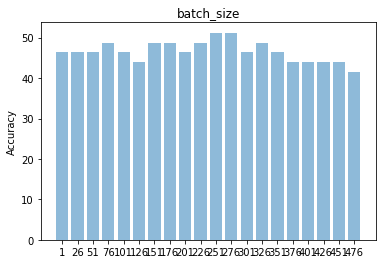

In [13]:
objects = batch_sizes
y_pos = np.arange(len(objects))
performance = model_results
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('batch_size')
 
plt.show()

### Study the impact of varying two hyper parameters

In [14]:
n_list = []
batch_sizes = []

batch_sizes = [1, 20, 100, 200, 500, len(train_data_list)]
hidden_nodes = [500, 50] # lets try two different configurations of hidden node layer

# lets create the set of modesl
for hidden in hidden_nodes:
    n_list_element = [] # first set of nets with a given hidden node size
    
    for batch in batch_sizes:
        n = neuralNetwork(batch_size=batch, hiddennodes=hidden)
        n.train(train_data_list)
        n_list_element.append(n)
        pass
    
    n_list.append(n_list_element)# now append the set of models 
    pass

#lets test the models 
#iterate through each model and accumilate number of correct predictions
model_results = []
model_result_element = []

for model1 in n_list:
    model_result_element = []
    
    for model2 in model1:
        correct = 0
        model2.test(test_data_list)
        
        for result in model2.results:
           
            if (result[0] == result[1]): 
                correct +=1
            pass
        correct = 100 * (correct / len(model2.results))
        model_result_element.append(correct)
        print(correct)
        pass
    pass
    model_results.append(model_result_element)
    pass



Training epoch#:  0
errors (SSE):  [8.0137022]
Training epoch#:  1
errors (SSE):  [8.42868154]
Training epoch#:  2
errors (SSE):  [12.06152131]
Training epoch#:  3
errors (SSE):  [11.84040745]
Training epoch#:  4
errors (SSE):  [12.62012845]
Training epoch#:  5
errors (SSE):  [12.84773093]
Training epoch#:  6
errors (SSE):  [12.77397263]
Training epoch#:  7
errors (SSE):  [10.5699862]
Training epoch#:  8
errors (SSE):  [9.31539493]
Training epoch#:  9
errors (SSE):  [8.79392577]
Training epoch#:  10
errors (SSE):  [7.92656814]
Training epoch#:  11
errors (SSE):  [7.05649931]
Training epoch#:  12
errors (SSE):  [7.55939082]
Training epoch#:  13
errors (SSE):  [7.71338273]
Training epoch#:  14
errors (SSE):  [6.77465617]
Training epoch#:  15
errors (SSE):  [6.53801256]
Training epoch#:  16
errors (SSE):  [5.82577754]
Training epoch#:  17
errors (SSE):  [6.38234988]
Training epoch#:  18
errors (SSE):  [6.3673675]
Training epoch#:  19
errors (SSE):  [6.32267217]
Training epoch#:  20
errors

errors (SSE):  [4.51132953]
Training epoch#:  167
errors (SSE):  [3.60822071]
Training epoch#:  168
errors (SSE):  [3.62941119]
Training epoch#:  169
errors (SSE):  [3.34257924]
Training epoch#:  170
errors (SSE):  [3.20591416]
Training epoch#:  171
errors (SSE):  [3.46870955]
Training epoch#:  172
errors (SSE):  [2.74441969]
Training epoch#:  173
errors (SSE):  [2.43106723]
Training epoch#:  174
errors (SSE):  [4.13051217]
Training epoch#:  175
errors (SSE):  [3.53682005]
Training epoch#:  176
errors (SSE):  [3.5378081]
Training epoch#:  177
errors (SSE):  [2.50211479]
Training epoch#:  178
errors (SSE):  [4.01837997]
Training epoch#:  179
errors (SSE):  [3.81997392]
Training epoch#:  180
errors (SSE):  [1.84570787]
Training epoch#:  181
errors (SSE):  [1.71580722]
Training epoch#:  182
errors (SSE):  [1.62112076]
Training epoch#:  183
errors (SSE):  [1.98289068]
Training epoch#:  184
errors (SSE):  [1.37424823]
Training epoch#:  185
errors (SSE):  [1.33097621]
Training epoch#:  186
e

errors (SSE):  [0.0578552]
Training epoch#:  336
errors (SSE):  [0.05719526]
Training epoch#:  337
errors (SSE):  [0.05655001]
Training epoch#:  338
errors (SSE):  [0.05591884]
Training epoch#:  339
errors (SSE):  [0.05530114]
Training epoch#:  340
errors (SSE):  [0.05469635]
Training epoch#:  341
errors (SSE):  [0.05410393]
Training epoch#:  342
errors (SSE):  [0.05352338]
Training epoch#:  343
errors (SSE):  [0.05295422]
Training epoch#:  344
errors (SSE):  [0.052396]
Training epoch#:  345
errors (SSE):  [0.05184829]
Training epoch#:  346
errors (SSE):  [0.05131068]
Training epoch#:  347
errors (SSE):  [0.05078281]
Training epoch#:  348
errors (SSE):  [0.05026431]
Training epoch#:  349
errors (SSE):  [0.04975486]
Training epoch#:  350
errors (SSE):  [0.04925413]
Training epoch#:  351
errors (SSE):  [0.04876185]
Training epoch#:  352
errors (SSE):  [0.04827772]
Training epoch#:  353
errors (SSE):  [0.04780149]
Training epoch#:  354
errors (SSE):  [0.04733291]
Training epoch#:  355
err

errors (SSE):  [82.86911443]
Training epoch#:  2
errors (SSE):  [141.5050749]
Training epoch#:  3
errors (SSE):  [165.22152558]
Training epoch#:  4
errors (SSE):  [130.49823498]
Training epoch#:  5
errors (SSE):  [119.65813588]
Training epoch#:  6
errors (SSE):  [116.91367711]
Training epoch#:  7
errors (SSE):  [107.46227354]
Training epoch#:  8
errors (SSE):  [117.24178852]
Training epoch#:  9
errors (SSE):  [98.65301367]
Training epoch#:  10
errors (SSE):  [95.85482384]
Training epoch#:  11
errors (SSE):  [87.1345418]
Training epoch#:  12
errors (SSE):  [86.64893138]
Training epoch#:  13
errors (SSE):  [84.07674349]
Training epoch#:  14
errors (SSE):  [89.60515059]
Training epoch#:  15
errors (SSE):  [96.97062308]
Training epoch#:  16
errors (SSE):  [91.84845144]
Training epoch#:  17
errors (SSE):  [91.06646025]
Training epoch#:  18
errors (SSE):  [88.1017831]
Training epoch#:  19
errors (SSE):  [91.95532174]
Training epoch#:  20
errors (SSE):  [100.34062314]
Training epoch#:  21
err

errors (SSE):  [34.43943982]
Training epoch#:  166
errors (SSE):  [34.14009982]
Training epoch#:  167
errors (SSE):  [33.84496874]
Training epoch#:  168
errors (SSE):  [33.55399475]
Training epoch#:  169
errors (SSE):  [33.2671368]
Training epoch#:  170
errors (SSE):  [32.98436119]
Training epoch#:  171
errors (SSE):  [32.70563865]
Training epoch#:  172
errors (SSE):  [32.43094176]
Training epoch#:  173
errors (SSE):  [32.16024282]
Training epoch#:  174
errors (SSE):  [31.89351214]
Training epoch#:  175
errors (SSE):  [31.63071678]
Training epoch#:  176
errors (SSE):  [31.37181957]
Training epoch#:  177
errors (SSE):  [31.11677857]
Training epoch#:  178
errors (SSE):  [30.86554673]
Training epoch#:  179
errors (SSE):  [30.61807178]
Training epoch#:  180
errors (SSE):  [30.37429636]
Training epoch#:  181
errors (SSE):  [30.13415825]
Training epoch#:  182
errors (SSE):  [29.89759067]
Training epoch#:  183
errors (SSE):  [29.66452267]
Training epoch#:  184
errors (SSE):  [29.43487958]
Tra

errors (SSE):  [12.01791049]
Training epoch#:  328
errors (SSE):  [11.96126534]
Training epoch#:  329
errors (SSE):  [11.90494603]
Training epoch#:  330
errors (SSE):  [11.84894763]
Training epoch#:  331
errors (SSE):  [11.79326538]
Training epoch#:  332
errors (SSE):  [11.73789468]
Training epoch#:  333
errors (SSE):  [11.68283109]
Training epoch#:  334
errors (SSE):  [11.62807029]
Training epoch#:  335
errors (SSE):  [11.5736081]
Training epoch#:  336
errors (SSE):  [11.51944045]
Training epoch#:  337
errors (SSE):  [11.46556339]
Training epoch#:  338
errors (SSE):  [11.41197305]
Training epoch#:  339
errors (SSE):  [11.35866566]
Training epoch#:  340
errors (SSE):  [11.30563754]
Training epoch#:  341
errors (SSE):  [11.25288505]
Training epoch#:  342
errors (SSE):  [11.20040466]
Training epoch#:  343
errors (SSE):  [11.14819286]
Training epoch#:  344
errors (SSE):  [11.09624621]
Training epoch#:  345
errors (SSE):  [11.0445613]
Training epoch#:  346
errors (SSE):  [10.99313478]
Trai

errors (SSE):  [5.09579842]
Training epoch#:  496
errors (SSE):  [5.06865024]
Training epoch#:  497
errors (SSE):  [5.0416722]
Training epoch#:  498
errors (SSE):  [5.01486339]
Training epoch#:  499
errors (SSE):  [4.9882229]
Training epoch#:  0
errors (SSE):  [157.75745459]
Training epoch#:  1
errors (SSE):  [95.87355828]
Training epoch#:  2
errors (SSE):  [161.00669331]
Training epoch#:  3
errors (SSE):  [97.77827657]
Training epoch#:  4
errors (SSE):  [158.14615458]
Training epoch#:  5
errors (SSE):  [88.7972718]
Training epoch#:  6
errors (SSE):  [163.35898957]
Training epoch#:  7
errors (SSE):  [100.00753448]
Training epoch#:  8
errors (SSE):  [177.44273967]
Training epoch#:  9
errors (SSE):  [92.20933294]
Training epoch#:  10
errors (SSE):  [67.27212778]
Training epoch#:  11
errors (SSE):  [84.63203674]
Training epoch#:  12
errors (SSE):  [96.48458658]
Training epoch#:  13
errors (SSE):  [83.72062732]
Training epoch#:  14
errors (SSE):  [58.81999559]
Training epoch#:  15
errors (

errors (SSE):  [41.62930958]
Training epoch#:  164
errors (SSE):  [40.24989068]
Training epoch#:  165
errors (SSE):  [38.84122113]
Training epoch#:  166
errors (SSE):  [37.38549925]
Training epoch#:  167
errors (SSE):  [35.84411331]
Training epoch#:  168
errors (SSE):  [34.19414907]
Training epoch#:  169
errors (SSE):  [32.57299818]
Training epoch#:  170
errors (SSE):  [31.66690355]
Training epoch#:  171
errors (SSE):  [32.6482119]
Training epoch#:  172
errors (SSE):  [35.18900949]
Training epoch#:  173
errors (SSE):  [37.32384187]
Training epoch#:  174
errors (SSE):  [37.88289275]
Training epoch#:  175
errors (SSE):  [37.22364402]
Training epoch#:  176
errors (SSE):  [36.02693518]
Training epoch#:  177
errors (SSE):  [34.57733588]
Training epoch#:  178
errors (SSE):  [32.94093292]
Training epoch#:  179
errors (SSE):  [31.15448253]
Training epoch#:  180
errors (SSE):  [29.41394944]
Training epoch#:  181
errors (SSE):  [28.30644244]
Training epoch#:  182
errors (SSE):  [28.54535448]
Tra

errors (SSE):  [25.57828616]
Training epoch#:  326
errors (SSE):  [26.00019073]
Training epoch#:  327
errors (SSE):  [26.34544514]
Training epoch#:  328
errors (SSE):  [26.55166484]
Training epoch#:  329
errors (SSE):  [26.54314056]
Training epoch#:  330
errors (SSE):  [26.2486517]
Training epoch#:  331
errors (SSE):  [25.63715807]
Training epoch#:  332
errors (SSE):  [24.76775335]
Training epoch#:  333
errors (SSE):  [23.82406552]
Training epoch#:  334
errors (SSE):  [23.05344429]
Training epoch#:  335
errors (SSE):  [22.59158029]
Training epoch#:  336
errors (SSE):  [22.39485404]
Training epoch#:  337
errors (SSE):  [22.3693172]
Training epoch#:  338
errors (SSE):  [22.45635343]
Training epoch#:  339
errors (SSE):  [22.62802316]
Training epoch#:  340
errors (SSE):  [22.87162081]
Training epoch#:  341
errors (SSE):  [23.1818077]
Training epoch#:  342
errors (SSE):  [23.5567114]
Training epoch#:  343
errors (SSE):  [23.99535339]
Training epoch#:  344
errors (SSE):  [24.49504535]
Traini

errors (SSE):  [24.14897822]
Training epoch#:  493
errors (SSE):  [24.14670167]
Training epoch#:  494
errors (SSE):  [24.14437965]
Training epoch#:  495
errors (SSE):  [24.14200963]
Training epoch#:  496
errors (SSE):  [24.13958946]
Training epoch#:  497
errors (SSE):  [24.13711746]
Training epoch#:  498
errors (SSE):  [24.13459243]
Training epoch#:  499
errors (SSE):  [24.13201354]
Training epoch#:  0
errors (SSE):  [148.83511303]
Training epoch#:  1
errors (SSE):  [163.09644153]
Training epoch#:  2
errors (SSE):  [109.14284584]
Training epoch#:  3
errors (SSE):  [152.09462599]
Training epoch#:  4
errors (SSE):  [161.89051213]
Training epoch#:  5
errors (SSE):  [109.39962745]
Training epoch#:  6
errors (SSE):  [131.12508158]
Training epoch#:  7
errors (SSE):  [156.57506046]
Training epoch#:  8
errors (SSE):  [108.14418191]
Training epoch#:  9
errors (SSE):  [153.55180653]
Training epoch#:  10
errors (SSE):  [144.4834108]
Training epoch#:  11
errors (SSE):  [108.2693184]
Training epoch

errors (SSE):  [52.19820869]
Training epoch#:  156
errors (SSE):  [52.77480544]
Training epoch#:  157
errors (SSE):  [51.95552501]
Training epoch#:  158
errors (SSE):  [52.52538884]
Training epoch#:  159
errors (SSE):  [51.71616209]
Training epoch#:  160
errors (SSE):  [52.27858855]
Training epoch#:  161
errors (SSE):  [51.47987474]
Training epoch#:  162
errors (SSE):  [52.03426364]
Training epoch#:  163
errors (SSE):  [51.24645648]
Training epoch#:  164
errors (SSE):  [51.7923038]
Training epoch#:  165
errors (SSE):  [51.01574051]
Training epoch#:  166
errors (SSE):  [51.55262704]
Training epoch#:  167
errors (SSE):  [50.78759542]
Training epoch#:  168
errors (SSE):  [51.31517204]
Training epoch#:  169
errors (SSE):  [50.56191527]
Training epoch#:  170
errors (SSE):  [51.07988573]
Training epoch#:  171
errors (SSE):  [50.33860435]
Training epoch#:  172
errors (SSE):  [50.84670744]
Training epoch#:  173
errors (SSE):  [50.11755851]
Training epoch#:  174
errors (SSE):  [50.61555199]
Tra

errors (SSE):  [41.44906615]
Training epoch#:  321
errors (SSE):  [40.74446535]
Training epoch#:  322
errors (SSE):  [41.12921682]
Training epoch#:  323
errors (SSE):  [40.43684392]
Training epoch#:  324
errors (SSE):  [40.81436321]
Training epoch#:  325
errors (SSE):  [40.13397215]
Training epoch#:  326
errors (SSE):  [40.50431114]
Training epoch#:  327
errors (SSE):  [39.83567428]
Training epoch#:  328
errors (SSE):  [40.19888981]
Training epoch#:  329
errors (SSE):  [39.54179555]
Training epoch#:  330
errors (SSE):  [39.89794874]
Training epoch#:  331
errors (SSE):  [39.25219949]
Training epoch#:  332
errors (SSE):  [39.60135519]
Training epoch#:  333
errors (SSE):  [38.96676554]
Training epoch#:  334
errors (SSE):  [39.30899184]
Training epoch#:  335
errors (SSE):  [38.68538696]
Training epoch#:  336
errors (SSE):  [39.02075481]
Training epoch#:  337
errors (SSE):  [38.40796911]
Training epoch#:  338
errors (SSE):  [38.73655192]
Training epoch#:  339
errors (SSE):  [38.13442778]
Tr

errors (SSE):  [26.10508727]
Training epoch#:  484
errors (SSE):  [26.15885376]
Training epoch#:  485
errors (SSE):  [26.01110605]
Training epoch#:  486
errors (SSE):  [26.06348421]
Training epoch#:  487
errors (SSE):  [25.9182688]
Training epoch#:  488
errors (SSE):  [25.9692977]
Training epoch#:  489
errors (SSE):  [25.82655461]
Training epoch#:  490
errors (SSE):  [25.87627244]
Training epoch#:  491
errors (SSE):  [25.73594345]
Training epoch#:  492
errors (SSE):  [25.78438748]
Training epoch#:  493
errors (SSE):  [25.64641609]
Training epoch#:  494
errors (SSE):  [25.69362273]
Training epoch#:  495
errors (SSE):  [25.55795408]
Training epoch#:  496
errors (SSE):  [25.60395884]
Training epoch#:  497
errors (SSE):  [25.47053971]
Training epoch#:  498
errors (SSE):  [25.51537722]
Training epoch#:  499
errors (SSE):  [25.38415595]
Training epoch#:  0
errors (SSE):  [93.36567977]
Training epoch#:  1
errors (SSE):  [84.92668152]
Training epoch#:  2
errors (SSE):  [115.67522991]
Training 

errors (SSE):  [46.6161165]
Training epoch#:  151
errors (SSE):  [46.23284982]
Training epoch#:  152
errors (SSE):  [46.3427195]
Training epoch#:  153
errors (SSE):  [45.96999408]
Training epoch#:  154
errors (SSE):  [46.07386524]
Training epoch#:  155
errors (SSE):  [45.71113256]
Training epoch#:  156
errors (SSE):  [45.80927482]
Training epoch#:  157
errors (SSE):  [45.45602305]
Training epoch#:  158
errors (SSE):  [45.54869491]
Training epoch#:  159
errors (SSE):  [45.20444653]
Training epoch#:  160
errors (SSE):  [45.29189514]
Training epoch#:  161
errors (SSE):  [44.95620466]
Training epoch#:  162
errors (SSE):  [45.03866579]
Training epoch#:  163
errors (SSE):  [44.71111761]
Training epoch#:  164
errors (SSE):  [44.78881571]
Training epoch#:  165
errors (SSE):  [44.46902205]
Training epoch#:  166
errors (SSE):  [44.54217046]
Training epoch#:  167
errors (SSE):  [44.2297695]
Training epoch#:  168
errors (SSE):  [44.29857066]
Training epoch#:  169
errors (SSE):  [43.99322473]
Train

errors (SSE):  [31.36668325]
Training epoch#:  313
errors (SSE):  [31.29290412]
Training epoch#:  314
errors (SSE):  [31.23898823]
Training epoch#:  315
errors (SSE):  [31.16668855]
Training epoch#:  316
errors (SSE):  [31.11255571]
Training epoch#:  317
errors (SSE):  [31.04167704]
Training epoch#:  318
errors (SSE):  [30.98737465]
Training epoch#:  319
errors (SSE):  [30.91785977]
Training epoch#:  320
errors (SSE):  [30.86343408]
Training epoch#:  321
errors (SSE):  [30.79522718]
Training epoch#:  322
errors (SSE):  [30.74072315]
Training epoch#:  323
errors (SSE):  [30.67376998]
Training epoch#:  324
errors (SSE):  [30.61923107]
Training epoch#:  325
errors (SSE):  [30.55347913]
Training epoch#:  326
errors (SSE):  [30.49894717]
Training epoch#:  327
errors (SSE):  [30.4343458]
Training epoch#:  328
errors (SSE):  [30.37986089]
Training epoch#:  329
errors (SSE):  [30.31636138]
Training epoch#:  330
errors (SSE):  [30.26196177]
Training epoch#:  331
errors (SSE):  [30.19951746]
Tra

errors (SSE):  [24.2184406]
Training epoch#:  476
errors (SSE):  [24.18969091]
Training epoch#:  477
errors (SSE):  [24.16106791]
Training epoch#:  478
errors (SSE):  [24.13257075]
Training epoch#:  479
errors (SSE):  [24.10419862]
Training epoch#:  480
errors (SSE):  [24.07595069]
Training epoch#:  481
errors (SSE):  [24.04782615]
Training epoch#:  482
errors (SSE):  [24.01982419]
Training epoch#:  483
errors (SSE):  [23.99194399]
Training epoch#:  484
errors (SSE):  [23.96418478]
Training epoch#:  485
errors (SSE):  [23.93654575]
Training epoch#:  486
errors (SSE):  [23.90902612]
Training epoch#:  487
errors (SSE):  [23.8816251]
Training epoch#:  488
errors (SSE):  [23.85434193]
Training epoch#:  489
errors (SSE):  [23.82717582]
Training epoch#:  490
errors (SSE):  [23.80012603]
Training epoch#:  491
errors (SSE):  [23.77319178]
Training epoch#:  492
errors (SSE):  [23.74637232]
Training epoch#:  493
errors (SSE):  [23.71966691]
Training epoch#:  494
errors (SSE):  [23.69307481]
Trai

errors (SSE):  [59.76267252]
Training epoch#:  139
errors (SSE):  [58.38351862]
Training epoch#:  140
errors (SSE):  [59.44426177]
Training epoch#:  141
errors (SSE):  [58.10967038]
Training epoch#:  142
errors (SSE):  [59.1356815]
Training epoch#:  143
errors (SSE):  [57.84205439]
Training epoch#:  144
errors (SSE):  [58.83622582]
Training epoch#:  145
errors (SSE):  [57.58028432]
Training epoch#:  146
errors (SSE):  [58.54521636]
Training epoch#:  147
errors (SSE):  [57.32396162]
Training epoch#:  148
errors (SSE):  [58.26200116]
Training epoch#:  149
errors (SSE):  [57.07268408]
Training epoch#:  150
errors (SSE):  [57.98595973]
Training epoch#:  151
errors (SSE):  [56.82605857]
Training epoch#:  152
errors (SSE):  [57.71651166]
Training epoch#:  153
errors (SSE):  [56.5837147]
Training epoch#:  154
errors (SSE):  [57.4531257]
Training epoch#:  155
errors (SSE):  [56.34531686]
Training epoch#:  156
errors (SSE):  [57.19532664]
Training epoch#:  157
errors (SSE):  [56.11057236]
Train

errors (SSE):  [71.66670167]
Training epoch#:  300
errors (SSE):  [71.20338219]
Training epoch#:  301
errors (SSE):  [72.31206047]
Training epoch#:  302
errors (SSE):  [71.05070972]
Training epoch#:  303
errors (SSE):  [68.98056192]
Training epoch#:  304
errors (SSE):  [67.09450892]
Training epoch#:  305
errors (SSE):  [65.88924248]
Training epoch#:  306
errors (SSE):  [64.38500508]
Training epoch#:  307
errors (SSE):  [63.09079494]
Training epoch#:  308
errors (SSE):  [61.48908927]
Training epoch#:  309
errors (SSE):  [60.2674677]
Training epoch#:  310
errors (SSE):  [58.75550317]
Training epoch#:  311
errors (SSE):  [57.66767345]
Training epoch#:  312
errors (SSE):  [56.28460478]
Training epoch#:  313
errors (SSE):  [55.35021412]
Training epoch#:  314
errors (SSE):  [54.13219081]
Training epoch#:  315
errors (SSE):  [53.34317353]
Training epoch#:  316
errors (SSE):  [52.30021907]
Training epoch#:  317
errors (SSE):  [51.62938044]
Training epoch#:  318
errors (SSE):  [50.74757398]
Tra

errors (SSE):  [34.01355794]
Training epoch#:  466
errors (SSE):  [34.72547481]
Training epoch#:  467
errors (SSE):  [33.74309505]
Training epoch#:  468
errors (SSE):  [34.49479902]
Training epoch#:  469
errors (SSE):  [33.48674106]
Training epoch#:  470
errors (SSE):  [34.27461984]
Training epoch#:  471
errors (SSE):  [33.24295092]
Training epoch#:  472
errors (SSE):  [34.06384775]
Training epoch#:  473
errors (SSE):  [33.01038887]
Training epoch#:  474
errors (SSE):  [33.86153503]
Training epoch#:  475
errors (SSE):  [32.78789828]
Training epoch#:  476
errors (SSE):  [33.66685632]
Training epoch#:  477
errors (SSE):  [32.57447572]
Training epoch#:  478
errors (SSE):  [33.47909153]
Training epoch#:  479
errors (SSE):  [32.36924868]
Training epoch#:  480
errors (SSE):  [33.29761119]
Training epoch#:  481
errors (SSE):  [32.17145655]
Training epoch#:  482
errors (SSE):  [33.12186368]
Training epoch#:  483
errors (SSE):  [31.98043447]
Training epoch#:  484
errors (SSE):  [32.95136443]
Tr

errors (SSE):  [2.88953187]
Training epoch#:  136
errors (SSE):  [2.73117454]
Training epoch#:  137
errors (SSE):  [2.56319624]
Training epoch#:  138
errors (SSE):  [2.40474545]
Training epoch#:  139
errors (SSE):  [2.26332278]
Training epoch#:  140
errors (SSE):  [2.13811914]
Training epoch#:  141
errors (SSE):  [2.02582736]
Training epoch#:  142
errors (SSE):  [1.92303874]
Training epoch#:  143
errors (SSE):  [1.82749618]
Training epoch#:  144
errors (SSE):  [1.73828962]
Training epoch#:  145
errors (SSE):  [1.65508172]
Training epoch#:  146
errors (SSE):  [1.57752736]
Training epoch#:  147
errors (SSE):  [1.5051727]
Training epoch#:  148
errors (SSE):  [1.43753972]
Training epoch#:  149
errors (SSE):  [1.37420133]
Training epoch#:  150
errors (SSE):  [1.31480932]
Training epoch#:  151
errors (SSE):  [1.25909018]
Training epoch#:  152
errors (SSE):  [1.20682571]
Training epoch#:  153
errors (SSE):  [1.1578286]
Training epoch#:  154
errors (SSE):  [1.11191858]
Training epoch#:  155
er

errors (SSE):  [0.18646128]
Training epoch#:  311
errors (SSE):  [0.18497467]
Training epoch#:  312
errors (SSE):  [0.18357346]
Training epoch#:  313
errors (SSE):  [0.18225195]
Training epoch#:  314
errors (SSE):  [0.18100432]
Training epoch#:  315
errors (SSE):  [0.17982472]
Training epoch#:  316
errors (SSE):  [0.17870727]
Training epoch#:  317
errors (SSE):  [0.17764614]
Training epoch#:  318
errors (SSE):  [0.17663559]
Training epoch#:  319
errors (SSE):  [0.17567002]
Training epoch#:  320
errors (SSE):  [0.17474398]
Training epoch#:  321
errors (SSE):  [0.17385227]
Training epoch#:  322
errors (SSE):  [0.17298987]
Training epoch#:  323
errors (SSE):  [0.17215206]
Training epoch#:  324
errors (SSE):  [0.17133439]
Training epoch#:  325
errors (SSE):  [0.1705327]
Training epoch#:  326
errors (SSE):  [0.16974313]
Training epoch#:  327
errors (SSE):  [0.16896213]
Training epoch#:  328
errors (SSE):  [0.16818648]
Training epoch#:  329
errors (SSE):  [0.16741324]
Training epoch#:  330
e

errors (SSE):  [0.03619255]
Training epoch#:  483
errors (SSE):  [0.03583868]
Training epoch#:  484
errors (SSE):  [0.03549105]
Training epoch#:  485
errors (SSE):  [0.03514951]
Training epoch#:  486
errors (SSE):  [0.03481394]
Training epoch#:  487
errors (SSE):  [0.03448422]
Training epoch#:  488
errors (SSE):  [0.03416023]
Training epoch#:  489
errors (SSE):  [0.03384185]
Training epoch#:  490
errors (SSE):  [0.03352897]
Training epoch#:  491
errors (SSE):  [0.03322147]
Training epoch#:  492
errors (SSE):  [0.03291925]
Training epoch#:  493
errors (SSE):  [0.03262219]
Training epoch#:  494
errors (SSE):  [0.03233019]
Training epoch#:  495
errors (SSE):  [0.03204314]
Training epoch#:  496
errors (SSE):  [0.03176095]
Training epoch#:  497
errors (SSE):  [0.03148351]
Training epoch#:  498
errors (SSE):  [0.03121072]
Training epoch#:  499
errors (SSE):  [0.03094249]
Training epoch#:  0
errors (SSE):  [112.63776573]
Training epoch#:  1
errors (SSE):  [107.27419341]
Training epoch#:  2
er

errors (SSE):  [26.16941036]
Training epoch#:  149
errors (SSE):  [26.06362088]
Training epoch#:  150
errors (SSE):  [25.95852997]
Training epoch#:  151
errors (SSE):  [25.85412081]
Training epoch#:  152
errors (SSE):  [25.75037718]
Training epoch#:  153
errors (SSE):  [25.64728341]
Training epoch#:  154
errors (SSE):  [25.54482436]
Training epoch#:  155
errors (SSE):  [25.44298543]
Training epoch#:  156
errors (SSE):  [25.34175254]
Training epoch#:  157
errors (SSE):  [25.24111208]
Training epoch#:  158
errors (SSE):  [25.14105095]
Training epoch#:  159
errors (SSE):  [25.04155649]
Training epoch#:  160
errors (SSE):  [24.94261651]
Training epoch#:  161
errors (SSE):  [24.84421924]
Training epoch#:  162
errors (SSE):  [24.74635337]
Training epoch#:  163
errors (SSE):  [24.64900794]
Training epoch#:  164
errors (SSE):  [24.55217245]
Training epoch#:  165
errors (SSE):  [24.45583674]
Training epoch#:  166
errors (SSE):  [24.35999104]
Training epoch#:  167
errors (SSE):  [24.26462593]
Tr

Training epoch#:  323
errors (SSE):  [13.13351812]
Training epoch#:  324
errors (SSE):  [13.08052008]
Training epoch#:  325
errors (SSE):  [13.02768966]
Training epoch#:  326
errors (SSE):  [12.97502551]
Training epoch#:  327
errors (SSE):  [12.92252628]
Training epoch#:  328
errors (SSE):  [12.87019063]
Training epoch#:  329
errors (SSE):  [12.81801727]
Training epoch#:  330
errors (SSE):  [12.76600489]
Training epoch#:  331
errors (SSE):  [12.71415221]
Training epoch#:  332
errors (SSE):  [12.66245799]
Training epoch#:  333
errors (SSE):  [12.61092098]
Training epoch#:  334
errors (SSE):  [12.55953997]
Training epoch#:  335
errors (SSE):  [12.50831376]
Training epoch#:  336
errors (SSE):  [12.45724117]
Training epoch#:  337
errors (SSE):  [12.40632107]
Training epoch#:  338
errors (SSE):  [12.3555523]
Training epoch#:  339
errors (SSE):  [12.30493378]
Training epoch#:  340
errors (SSE):  [12.25446441]
Training epoch#:  341
errors (SSE):  [12.20414314]
Training epoch#:  342
errors (SS

errors (SSE):  [5.99334847]
Training epoch#:  498
errors (SSE):  [5.96440914]
Training epoch#:  499
errors (SSE):  [5.93561115]
Training epoch#:  0
errors (SSE):  [88.033542]
Training epoch#:  1
errors (SSE):  [75.59105613]
Training epoch#:  2
errors (SSE):  [75.41196069]
Training epoch#:  3
errors (SSE):  [74.2417939]
Training epoch#:  4
errors (SSE):  [73.23802622]
Training epoch#:  5
errors (SSE):  [72.27509616]
Training epoch#:  6
errors (SSE):  [71.35641418]
Training epoch#:  7
errors (SSE):  [70.47661408]
Training epoch#:  8
errors (SSE):  [69.63171567]
Training epoch#:  9
errors (SSE):  [68.81824766]
Training epoch#:  10
errors (SSE):  [68.03321866]
Training epoch#:  11
errors (SSE):  [67.27403976]
Training epoch#:  12
errors (SSE):  [66.53846366]
Training epoch#:  13
errors (SSE):  [65.82453347]
Training epoch#:  14
errors (SSE):  [65.13053996]
Training epoch#:  15
errors (SSE):  [64.45498569]
Training epoch#:  16
errors (SSE):  [63.79655502]
Training epoch#:  17
errors (SSE): 

errors (SSE):  [28.65321062]
Training epoch#:  168
errors (SSE):  [28.58256754]
Training epoch#:  169
errors (SSE):  [28.51257228]
Training epoch#:  170
errors (SSE):  [28.44321476]
Training epoch#:  171
errors (SSE):  [28.37448509]
Training epoch#:  172
errors (SSE):  [28.30637359]
Training epoch#:  173
errors (SSE):  [28.23887078]
Training epoch#:  174
errors (SSE):  [28.17196738]
Training epoch#:  175
errors (SSE):  [28.10565429]
Training epoch#:  176
errors (SSE):  [28.0399226]
Training epoch#:  177
errors (SSE):  [27.97476359]
Training epoch#:  178
errors (SSE):  [27.91016871]
Training epoch#:  179
errors (SSE):  [27.84612956]
Training epoch#:  180
errors (SSE):  [27.78263795]
Training epoch#:  181
errors (SSE):  [27.71968582]
Training epoch#:  182
errors (SSE):  [27.65726529]
Training epoch#:  183
errors (SSE):  [27.59536863]
Training epoch#:  184
errors (SSE):  [27.53398825]
Training epoch#:  185
errors (SSE):  [27.47311672]
Training epoch#:  186
errors (SSE):  [27.41274675]
Tra

errors (SSE):  [21.80578139]
Training epoch#:  331
errors (SSE):  [21.77954578]
Training epoch#:  332
errors (SSE):  [21.75341445]
Training epoch#:  333
errors (SSE):  [21.72738655]
Training epoch#:  334
errors (SSE):  [21.70146122]
Training epoch#:  335
errors (SSE):  [21.67563763]
Training epoch#:  336
errors (SSE):  [21.64991493]
Training epoch#:  337
errors (SSE):  [21.62429231]
Training epoch#:  338
errors (SSE):  [21.59876895]
Training epoch#:  339
errors (SSE):  [21.57334404]
Training epoch#:  340
errors (SSE):  [21.54801679]
Training epoch#:  341
errors (SSE):  [21.5227864]
Training epoch#:  342
errors (SSE):  [21.49765211]
Training epoch#:  343
errors (SSE):  [21.47261313]
Training epoch#:  344
errors (SSE):  [21.44766871]
Training epoch#:  345
errors (SSE):  [21.42281808]
Training epoch#:  346
errors (SSE):  [21.39806051]
Training epoch#:  347
errors (SSE):  [21.37339525]
Training epoch#:  348
errors (SSE):  [21.34882158]
Training epoch#:  349
errors (SSE):  [21.32433877]
Tra

errors (SSE):  [18.45339804]
Training epoch#:  496
errors (SSE):  [18.43723798]
Training epoch#:  497
errors (SSE):  [18.421113]
Training epoch#:  498
errors (SSE):  [18.40502292]
Training epoch#:  499
errors (SSE):  [18.38896756]
Training epoch#:  0
errors (SSE):  [179.97805006]
Training epoch#:  1
errors (SSE):  [109.4815357]
Training epoch#:  2
errors (SSE):  [71.37756046]
Training epoch#:  3
errors (SSE):  [68.48530525]
Training epoch#:  4
errors (SSE):  [67.83516506]
Training epoch#:  5
errors (SSE):  [67.35864109]
Training epoch#:  6
errors (SSE):  [66.91453128]
Training epoch#:  7
errors (SSE):  [66.48034363]
Training epoch#:  8
errors (SSE):  [66.05631995]
Training epoch#:  9
errors (SSE):  [65.64152617]
Training epoch#:  10
errors (SSE):  [65.2355646]
Training epoch#:  11
errors (SSE):  [64.8379881]
Training epoch#:  12
errors (SSE):  [64.4483915]
Training epoch#:  13
errors (SSE):  [64.06639759]
Training epoch#:  14
errors (SSE):  [63.69165647]
Training epoch#:  15
errors (SS

errors (SSE):  [38.00805926]
Training epoch#:  161
errors (SSE):  [37.92312723]
Training epoch#:  162
errors (SSE):  [37.83880978]
Training epoch#:  163
errors (SSE):  [37.75510033]
Training epoch#:  164
errors (SSE):  [37.67199236]
Training epoch#:  165
errors (SSE):  [37.58947942]
Training epoch#:  166
errors (SSE):  [37.50755515]
Training epoch#:  167
errors (SSE):  [37.42621325]
Training epoch#:  168
errors (SSE):  [37.3454475]
Training epoch#:  169
errors (SSE):  [37.26525176]
Training epoch#:  170
errors (SSE):  [37.18561992]
Training epoch#:  171
errors (SSE):  [37.106546]
Training epoch#:  172
errors (SSE):  [37.02802404]
Training epoch#:  173
errors (SSE):  [36.95004816]
Training epoch#:  174
errors (SSE):  [36.87261257]
Training epoch#:  175
errors (SSE):  [36.79571152]
Training epoch#:  176
errors (SSE):  [36.71933934]
Training epoch#:  177
errors (SSE):  [36.64349042]
Training epoch#:  178
errors (SSE):  [36.56815922]
Training epoch#:  179
errors (SSE):  [36.49334025]
Train

errors (SSE):  [29.19215747]
Training epoch#:  324
errors (SSE):  [29.15709671]
Training epoch#:  325
errors (SSE):  [29.12217742]
Training epoch#:  326
errors (SSE):  [29.08739864]
Training epoch#:  327
errors (SSE):  [29.05275942]
Training epoch#:  328
errors (SSE):  [29.0182588]
Training epoch#:  329
errors (SSE):  [28.98389587]
Training epoch#:  330
errors (SSE):  [28.94966968]
Training epoch#:  331
errors (SSE):  [28.91557933]
Training epoch#:  332
errors (SSE):  [28.88162391]
Training epoch#:  333
errors (SSE):  [28.84780252]
Training epoch#:  334
errors (SSE):  [28.81411428]
Training epoch#:  335
errors (SSE):  [28.78055829]
Training epoch#:  336
errors (SSE):  [28.74713369]
Training epoch#:  337
errors (SSE):  [28.71383961]
Training epoch#:  338
errors (SSE):  [28.6806752]
Training epoch#:  339
errors (SSE):  [28.64763961]
Training epoch#:  340
errors (SSE):  [28.614732]
Training epoch#:  341
errors (SSE):  [28.58195153]
Training epoch#:  342
errors (SSE):  [28.54929739]
Traini

errors (SSE):  [24.67134688]
Training epoch#:  496
errors (SSE):  [24.65150925]
Training epoch#:  497
errors (SSE):  [24.63172563]
Training epoch#:  498
errors (SSE):  [24.61199575]
Training epoch#:  499
errors (SSE):  [24.59231937]
Training epoch#:  0
errors (SSE):  [81.7585511]
Training epoch#:  1
errors (SSE):  [74.48979169]
Training epoch#:  2
errors (SSE):  [71.71703784]
Training epoch#:  3
errors (SSE):  [70.56361287]
Training epoch#:  4
errors (SSE):  [69.99609915]
Training epoch#:  5
errors (SSE):  [69.65373922]
Training epoch#:  6
errors (SSE):  [69.40262845]
Training epoch#:  7
errors (SSE):  [69.1901108]
Training epoch#:  8
errors (SSE):  [68.99460034]
Training epoch#:  9
errors (SSE):  [68.80700581]
Training epoch#:  10
errors (SSE):  [68.62344057]
Training epoch#:  11
errors (SSE):  [68.44223594]
Training epoch#:  12
errors (SSE):  [68.26268035]
Training epoch#:  13
errors (SSE):  [68.08447638]
Training epoch#:  14
errors (SSE):  [67.90750427]
Training epoch#:  15
errors (

errors (SSE):  [49.86183956]
Training epoch#:  173
errors (SSE):  [49.78846177]
Training epoch#:  174
errors (SSE):  [49.71541834]
Training epoch#:  175
errors (SSE):  [49.64270697]
Training epoch#:  176
errors (SSE):  [49.57032542]
Training epoch#:  177
errors (SSE):  [49.49827145]
Training epoch#:  178
errors (SSE):  [49.42654283]
Training epoch#:  179
errors (SSE):  [49.35513737]
Training epoch#:  180
errors (SSE):  [49.28405286]
Training epoch#:  181
errors (SSE):  [49.21328715]
Training epoch#:  182
errors (SSE):  [49.14283809]
Training epoch#:  183
errors (SSE):  [49.07270352]
Training epoch#:  184
errors (SSE):  [49.00288134]
Training epoch#:  185
errors (SSE):  [48.93336944]
Training epoch#:  186
errors (SSE):  [48.86416572]
Training epoch#:  187
errors (SSE):  [48.79526813]
Training epoch#:  188
errors (SSE):  [48.7266746]
Training epoch#:  189
errors (SSE):  [48.65838309]
Training epoch#:  190
errors (SSE):  [48.59039158]
Training epoch#:  191
errors (SSE):  [48.52269806]
Tra

errors (SSE):  [40.90319885]
Training epoch#:  341
errors (SSE):  [40.86425099]
Training epoch#:  342
errors (SSE):  [40.82542244]
Training epoch#:  343
errors (SSE):  [40.78671256]
Training epoch#:  344
errors (SSE):  [40.74812074]
Training epoch#:  345
errors (SSE):  [40.70964636]
Training epoch#:  346
errors (SSE):  [40.6712888]
Training epoch#:  347
errors (SSE):  [40.63304746]
Training epoch#:  348
errors (SSE):  [40.59492173]
Training epoch#:  349
errors (SSE):  [40.556911]
Training epoch#:  350
errors (SSE):  [40.51901469]
Training epoch#:  351
errors (SSE):  [40.48123219]
Training epoch#:  352
errors (SSE):  [40.44356293]
Training epoch#:  353
errors (SSE):  [40.40600631]
Training epoch#:  354
errors (SSE):  [40.36856177]
Training epoch#:  355
errors (SSE):  [40.33122872]
Training epoch#:  356
errors (SSE):  [40.29400659]
Training epoch#:  357
errors (SSE):  [40.25689482]
Training epoch#:  358
errors (SSE):  [40.21989284]
Training epoch#:  359
errors (SSE):  [40.18300009]
Train

errors (SSE):  [65.239155]
Training epoch#:  13
errors (SSE):  [64.72636854]
Training epoch#:  14
errors (SSE):  [64.22580893]
Training epoch#:  15
errors (SSE):  [63.73699803]
Training epoch#:  16
errors (SSE):  [63.25947999]
Training epoch#:  17
errors (SSE):  [62.79282102]
Training epoch#:  18
errors (SSE):  [62.3366088]
Training epoch#:  19
errors (SSE):  [61.89045183]
Training epoch#:  20
errors (SSE):  [61.4539786]
Training epoch#:  21
errors (SSE):  [61.02683673]
Training epoch#:  22
errors (SSE):  [60.60869206]
Training epoch#:  23
errors (SSE):  [60.19922767]
Training epoch#:  24
errors (SSE):  [59.798143]
Training epoch#:  25
errors (SSE):  [59.40515285]
Training epoch#:  26
errors (SSE):  [59.01998655]
Training epoch#:  27
errors (SSE):  [58.64238701]
Training epoch#:  28
errors (SSE):  [58.27210994]
Training epoch#:  29
errors (SSE):  [57.90892301]
Training epoch#:  30
errors (SSE):  [57.5526051]
Training epoch#:  31
errors (SSE):  [57.2029456]
Training epoch#:  32
errors (

errors (SSE):  [34.20362462]
Training epoch#:  189
errors (SSE):  [34.13719399]
Training epoch#:  190
errors (SSE):  [34.07118587]
Training epoch#:  191
errors (SSE):  [34.00559588]
Training epoch#:  192
errors (SSE):  [33.94041973]
Training epoch#:  193
errors (SSE):  [33.87565317]
Training epoch#:  194
errors (SSE):  [33.81129201]
Training epoch#:  195
errors (SSE):  [33.74733212]
Training epoch#:  196
errors (SSE):  [33.68376942]
Training epoch#:  197
errors (SSE):  [33.6205999]
Training epoch#:  198
errors (SSE):  [33.5578196]
Training epoch#:  199
errors (SSE):  [33.49542461]
Training epoch#:  200
errors (SSE):  [33.43341107]
Training epoch#:  201
errors (SSE):  [33.37177518]
Training epoch#:  202
errors (SSE):  [33.31051319]
Training epoch#:  203
errors (SSE):  [33.24962139]
Training epoch#:  204
errors (SSE):  [33.18909613]
Training epoch#:  205
errors (SSE):  [33.12893381]
Training epoch#:  206
errors (SSE):  [33.06913087]
Training epoch#:  207
errors (SSE):  [33.00968379]
Trai

errors (SSE):  [26.90921935]
Training epoch#:  354
errors (SSE):  [26.87942952]
Training epoch#:  355
errors (SSE):  [26.84975124]
Training epoch#:  356
errors (SSE):  [26.82018379]
Training epoch#:  357
errors (SSE):  [26.79072648]
Training epoch#:  358
errors (SSE):  [26.76137862]
Training epoch#:  359
errors (SSE):  [26.73213952]
Training epoch#:  360
errors (SSE):  [26.70300849]
Training epoch#:  361
errors (SSE):  [26.67398485]
Training epoch#:  362
errors (SSE):  [26.64506795]
Training epoch#:  363
errors (SSE):  [26.6162571]
Training epoch#:  364
errors (SSE):  [26.58755165]
Training epoch#:  365
errors (SSE):  [26.55895095]
Training epoch#:  366
errors (SSE):  [26.53045435]
Training epoch#:  367
errors (SSE):  [26.50206119]
Training epoch#:  368
errors (SSE):  [26.47377086]
Training epoch#:  369
errors (SSE):  [26.4455827]
Training epoch#:  370
errors (SSE):  [26.4174961]
Training epoch#:  371
errors (SSE):  [26.38951043]
Training epoch#:  372
errors (SSE):  [26.36162508]
Train

## Plot the results of hidden nodes versus batch size

In the graph below we have plotted the accuracy for 6 different batch sizes comparing against 2 architectures (one with 200 hidden nodes and the other with 4 hidden nodes). 
As expected when the ANN architecture has fewer hidden nodes it has less oppertunity to learn a sensible mapping between the input features and expected outputs. 

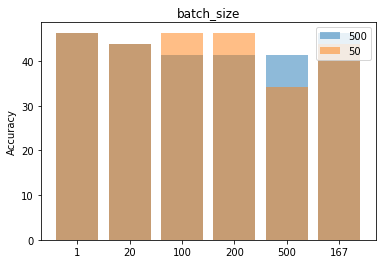

In [15]:
objects = batch_sizes

y_pos = np.arange(len(objects))
performance1 = model_results[0]
performance2 = model_results[1]
 
plt.bar(y_pos, performance1, align='center', alpha=0.5 )
plt.bar(y_pos, performance2, align='center', alpha=0.5)

plt.legend(hidden_nodes)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('batch_size')
 
plt.show()

# Exercise
You should now try exploring with different hyper-parameters: 

- What is the effect of increasing learning rate on accuracy?
- What happens to network error with increased number of epochs?
- What is the effect of increasing training epochs on test set accuracy?
- What happens to accuracy when you increase batch size?
- What is the effect of increasing the nummber of hidden layer nodes on accuracy?
- Explore the different charting functionality provided by matplotlib (https://matplotlib.org/)

In [16]:
#create instance of neuralnet
opt_n_list = []

opt_n = neuralNetwork(batch_size = 167, epochs = 500)

opt_n.train(train_data_list)

opt_n_list.append(opt_n)

opt_n.test(test_data_list)

for result in opt_n.results:
    if (result[0] == result[1]):
            correct += 1
    pass
pass

print ("Test set accuracy% = ", (100 * correct / len(opt_n.results)))

Training epoch#:  0
errors (SSE):  [78.41315436]
Training epoch#:  1
errors (SSE):  [78.69030988]
Training epoch#:  2
errors (SSE):  [79.74012872]
Training epoch#:  3
errors (SSE):  [75.76883265]
Training epoch#:  4
errors (SSE):  [77.94258565]
Training epoch#:  5
errors (SSE):  [73.54340871]
Training epoch#:  6
errors (SSE):  [76.71345656]
Training epoch#:  7
errors (SSE):  [71.70145692]
Training epoch#:  8
errors (SSE):  [75.8900931]
Training epoch#:  9
errors (SSE):  [70.43810894]
Training epoch#:  10
errors (SSE):  [75.64006897]
Training epoch#:  11
errors (SSE):  [69.45544337]
Training epoch#:  12
errors (SSE):  [75.41598537]
Training epoch#:  13
errors (SSE):  [68.23938229]
Training epoch#:  14
errors (SSE):  [74.53524356]
Training epoch#:  15
errors (SSE):  [66.68504815]
Training epoch#:  16
errors (SSE):  [73.02811056]
Training epoch#:  17
errors (SSE):  [65.04381318]
Training epoch#:  18
errors (SSE):  [71.29561553]
Training epoch#:  19
errors (SSE):  [63.42501242]
Training ep

errors (SSE):  [27.37241599]
Training epoch#:  168
errors (SSE):  [27.32116636]
Training epoch#:  169
errors (SSE):  [27.27037568]
Training epoch#:  170
errors (SSE):  [27.22003756]
Training epoch#:  171
errors (SSE):  [27.17014356]
Training epoch#:  172
errors (SSE):  [27.12068704]
Training epoch#:  173
errors (SSE):  [27.07166034]
Training epoch#:  174
errors (SSE):  [27.02305681]
Training epoch#:  175
errors (SSE):  [26.97486936]
Training epoch#:  176
errors (SSE):  [26.92709146]
Training epoch#:  177
errors (SSE):  [26.87971646]
Training epoch#:  178
errors (SSE):  [26.83273805]
Training epoch#:  179
errors (SSE):  [26.78614989]
Training epoch#:  180
errors (SSE):  [26.73994592]
Training epoch#:  181
errors (SSE):  [26.69412011]
Training epoch#:  182
errors (SSE):  [26.64866663]
Training epoch#:  183
errors (SSE):  [26.60357972]
Training epoch#:  184
errors (SSE):  [26.55885378]
Training epoch#:  185
errors (SSE):  [26.51448331]
Training epoch#:  186
errors (SSE):  [26.47046293]
Tr

errors (SSE):  [22.21108334]
Training epoch#:  333
errors (SSE):  [22.19064294]
Training epoch#:  334
errors (SSE):  [22.17027425]
Training epoch#:  335
errors (SSE):  [22.14997672]
Training epoch#:  336
errors (SSE):  [22.12974983]
Training epoch#:  337
errors (SSE):  [22.10959303]
Training epoch#:  338
errors (SSE):  [22.08950578]
Training epoch#:  339
errors (SSE):  [22.06948758]
Training epoch#:  340
errors (SSE):  [22.0495379]
Training epoch#:  341
errors (SSE):  [22.02965622]
Training epoch#:  342
errors (SSE):  [22.00984204]
Training epoch#:  343
errors (SSE):  [21.99009486]
Training epoch#:  344
errors (SSE):  [21.97041418]
Training epoch#:  345
errors (SSE):  [21.95079952]
Training epoch#:  346
errors (SSE):  [21.93125038]
Training epoch#:  347
errors (SSE):  [21.91176629]
Training epoch#:  348
errors (SSE):  [21.89234677]
Training epoch#:  349
errors (SSE):  [21.87299135]
Training epoch#:  350
errors (SSE):  [21.85369957]
Training epoch#:  351
errors (SSE):  [21.83447097]
Tra

errors (SSE):  [19.55655408]
Training epoch#:  496
errors (SSE):  [19.54329582]
Training epoch#:  497
errors (SSE):  [19.53006433]
Training epoch#:  498
errors (SSE):  [19.51685948]
Training epoch#:  499
errors (SSE):  [19.50368116]
Test set accuracy% =  153.4205829863177


In [18]:
opt_n_list[0]